Jump to [Part 1](#Step1)


# Objectives: 

Buying a house is a stressful process. We want to use machine learning to provide additional information. In this notebook, we want to build a model to predict the prices of residential homes in Ames, Iowa. This model will provide buyers with a rough estimate of what the houses are actually worth. 


## This notebook is divided into 4 sections:
* Data Description
* Exploratory Data Analyis or EDA (in short)
    * Load and understand the data using pandas 
    * Variable identification
    * Univariate analysis 
        * Target variable analysis
        * Deal with Missing values 
        * Generating new features 
        * Transforming Categorical Variables using Scikit-Learn 
        * Check skewness or distribution of numeric variables
        * Getting dummy categorical features.
    * Multivariate analysis 
        * Correlation matrix
        * Relation Exploration for Few Numerical Variables and categorical features
        * Dealing with Outliers 
* Feature selection using Wrapper Methods 
    * Forward selection
* Preditct house prices (linear regression and XGBOOSTER) 
    * About Linear Regression 
    * Linear Regression using Statsmodels
    * Interpreting the Regression Results
    * Making Predictions based on the Regression Results
    * Predict house price using sklearn linear regression and XGBRegressor
        * Splitting the dataset into training and testing 
        * Build models (Linear Regression and XGBRegressor) 


# Data Description
The files given are:

1. train.csv: This is the dataset that we are gonna use to train our model to give predictions. SalePrice is theproperty's sale price in dollars. This is the target variable that we are trying to predict.
2. test.csv: The test set will be used to see how well our model performs on unseen data. For the test set, we do not provide the Target variable i.e, SalePrice. It is our job to predict these outcomes. For each passenger in the house, we use the model that we trained to predict the price of the house.
3. data_description.txt: This gives us the full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.
4. sample_submission.csv: a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. This serves as an example of how our submission should look like.

You can find all the files in the "House Prices - Advanced Regression Techniques" Kaggle competition url: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# Exploratory Data Analyis (EDA)

## Importing the Libraries

In [1]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats            # for some statistics
from scipy.stats import norm, skew # for some statistics
import seaborn as sns              # plot
import matplotlib.pyplot as plt    # plot 
%matplotlib inline

## Load and understand the dataset using pandas

This is how we assign the datasets to variables in python using pandas.

In [2]:
# load train data 
df_train = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/train.csv")
# display data 
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Load Test data
df_test = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/test.csv")
# display test data 
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


***Print the first five rows of the dataset***

In [4]:
# We will use the .head() function to display the first five columns of the dataset to get a feel of the dataset.
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Print last 5 rows of the dataset***

In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


***Find out the total number of rows and columns of the data set***

In [6]:
df_train.shape

(1460, 81)

***Find out the columns, data types, and presence of null values or missing values in the data set***

In [7]:
#info gives us information about index and column data types.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

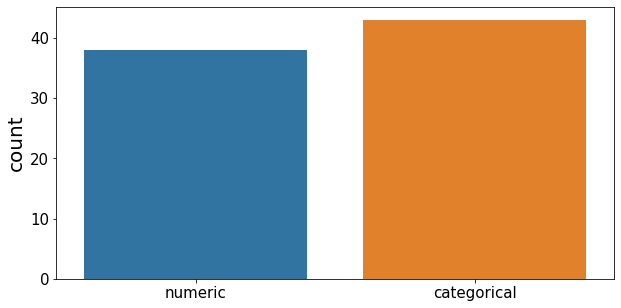

In [8]:
# Checking how many column have a categorical and numerical data type
column_data_type = []
for col in df_train.columns:
    data_type = df_train[col].dtype
    if df_train[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(10,5))
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
sns.countplot(x=column_data_type)
plt.show()

In [9]:
print("{} numbers of columns have a numerical data type" .format(column_data_type.count('numeric')))
print("{} numbers of columns have a categorical data type" .format(column_data_type.count('categorical')))

38 numbers of columns have a numerical data type
43 numbers of columns have a categorical data type


## Variable identification

***The goal is to predict house prices, so the target variable (or dependent variable) is "SalePrice", where the rest of the columns might be considered as predictor variables (independent variables).***


### Deal with Missing values 

In [10]:
# check the number of missing values in each column 
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Let us look at the percentage of the missing values of the dataset.

In [11]:
# another way to present missing values in each column 
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(df_train)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageType,81,5.547945
7,GarageYrBlt,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


### impute the missing values onto the features 

***1. We will impute the Nan or null values of 'PoolQC' with None because there are about 99.5% null values, which means that most houses don't have a Pool.***



In [12]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

***2 We will impute the Nan or null values of 'MiscFeature' with None because there are about 96.3% null values, which means that most houses don't contain miscellaneous Features.***

In [13]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

***3.We will impute the Nan or null values of 'Alley' which refers to type of Alley access with None as null values signify that the house does not contain any Alley access.***

In [14]:
df_train["Alley"] = df_train["Alley"].fillna("None")

***4.We will impute the Nan or null values of 'Fence' with None as null values signify that the house does not contain any Fences.***

In [15]:
df_train["Fence"] = df_train["Fence"].fillna("None")

***5.We will impute the Nan or null values of 'FireplaceQu' with None as null values signify that the house does not contain any fireplace.***

In [16]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

***6.We will impute the Nan or null values of 'LotFrontage' with median values taking into consideration that the area of each street connected to the house property is most likely similar to other houses of the Neighborhood.***

In [17]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

***7.We replace the 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' missing values into None signifying that those homes most likely don't have any garage for vehicles.***

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

***8.We replace the null values of 'GarageYrBlt', 'GarageArea', 'GarageCars' as no garage equals no cars.***

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

***9. The missing values of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are filled with zero because the null values most likely signifies no basement.***

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

***10.The missing values'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 are filled with Nonne as NaN values signifies no basement.***

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

***11.The NA values of "MasVnrType" and "MasVnrArea" refer to no masonry veneer for these houses. Therefore the Area can be imputed with zero and the type can be imputed with None.***

In [22]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

***12. The 'MSZoning' refers to the general zoning classification. We fill the NaN values with 'RL' which is the most occurring value.***

In [23]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

***13.Most of the values of this feature are "AllPub" except for one "NoSeWa" and 2 NA. Since the house with "NoSewa' is present in the training set, this feature is not helpful in predictive modeling so we drop it.***

In [24]:
df_train = df_train.drop(['Utilities'], axis=1)

***14.The NA values means typical which is mentioned in the data description.***

In [25]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

***15.There is only one NA value present here in "Electrical" so we impute it 'SBrkr' since it is the most occurring value.***

In [26]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

***16.There is only one NA value present here in "KitchenQual" so we impute it 'TA' since it is the most occurring value.***

In [27]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

***17.There is only one NA value present in both Exterior1st and Exterior2nd so we fill it with the most frequent string.***

In [28]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

***18.Fill it again with the most frequent which is "WD" in this case.***

In [29]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

***19.The NA values here refers to No Building class so we fill it with None.***

In [30]:
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

In [31]:
# Checking the maximum of null variable it have 
df_train.isnull().sum().max()

0

The result 0 above shows we no longer have any missing values.

### Generating new features

We can generate some new features from existing ones. 

***1. the total square feet of the house can be computed as: Total_Square_Feet = BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF + TotalBsmtSF***

In [32]:
df_train['Total_Square_Feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] + 
                                                                 df_train['2ndFlrSF'] + df_train['TotalBsmtSF'])

***2.Total number of Baths in the house can be computed as: Total_Bath = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5*BsmtHalfBath***

In [33]:
df_train['Total_Bath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] + 
                                                                  (0.5 * df_train['BsmtHalfBath']))

***3.Total_Porch_Area can be computed as: Total_Porch_Area = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF***

In [34]:
df_train['Total_Porch_Area'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] + 
                                df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])

***4.the size of per room in the house can be computed as: SqFtPerRoom =  GrLivArea/(TotRmsAbvGrd + FullBath + HalfBath + KitchenAbvGr***

In [35]:
df_train['SqFtPerRoom'] = df_train['GrLivArea'] / (df_train['TotRmsAbvGrd'] + df_train['FullBath'] +
                                                       df_train['HalfBath'] + df_train['KitchenAbvGr'])

### Transforming Categorical Variables using Scikit-Learn 



In [36]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape        
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1460, 84)


In [38]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Square_Feet,Total_Bath,Total_Porch_Area,SqFtPerRoom
0,1,9,RL,65.0,8450,1,1,3,Lvl,Inside,...,0,4,2,WD,Normal,208500,3272,3.5,61,142.500000
1,2,4,RL,80.0,9600,1,1,3,Lvl,FR2,...,0,7,1,WD,Normal,181500,3502,2.5,298,140.222222
2,3,9,RL,68.0,11250,1,1,0,Lvl,Inside,...,0,11,2,WD,Normal,223500,3192,3.5,42,178.600000
3,4,10,RL,60.0,9550,1,1,0,Lvl,Corner,...,0,4,0,WD,Abnorml,140000,2689,2.0,307,190.777778
4,5,9,RL,84.0,14260,1,1,0,Lvl,FR2,...,0,3,2,WD,Normal,250000,3998,3.5,276,169.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,9,RL,62.0,7917,1,1,3,Lvl,Inside,...,0,10,1,WD,Normal,175000,2600,2.5,40,149.727273
1456,1457,4,RL,85.0,13175,1,1,3,Lvl,Inside,...,0,4,4,WD,Normal,210000,4568,3.0,349,207.300000
1457,1458,10,RL,66.0,9042,1,1,3,Lvl,Inside,...,2500,7,4,WD,Normal,266500,3767,2.0,60,195.000000
1458,1459,4,RL,68.0,9717,1,1,3,Lvl,Inside,...,0,6,4,WD,Normal,142125,3234,2.0,478,154.000000


### Check skewness or distribution of numeric variables

In [39]:
# find all the columsn of numeric variables 
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [40]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'Total_Square_Feet', 'Total_Bath',
       'Total_Porch_Area', 'SqFtPerRoom'],
      dtype='object')

In [41]:
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


***We find the skewed features and then perform Box Cox Transformation of highly skewed features.***

In [42]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)


There are 64 skewed numerical features to Box Cox transform


### Getting dummy categorical features

In [43]:
#Getting dummy categorical features.
df_train = pd.get_dummies(df_train)
print(df_train.shape)

(1460, 226)


In [44]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,1.540963,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,1.820334,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,2.055642,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,...,0,0,0,1,0,0,0,0,1,0


## Univariate Analysis

***Target Variable Analysis***

***Check the distribution of the target variable***


 mu = 33.88 and sigma = 2.44



/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


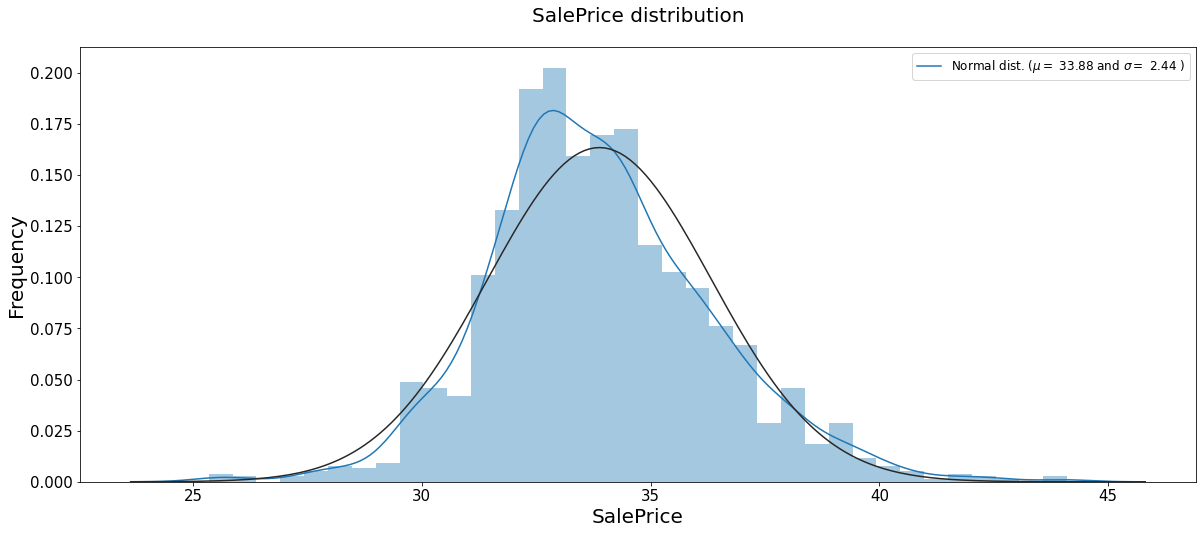

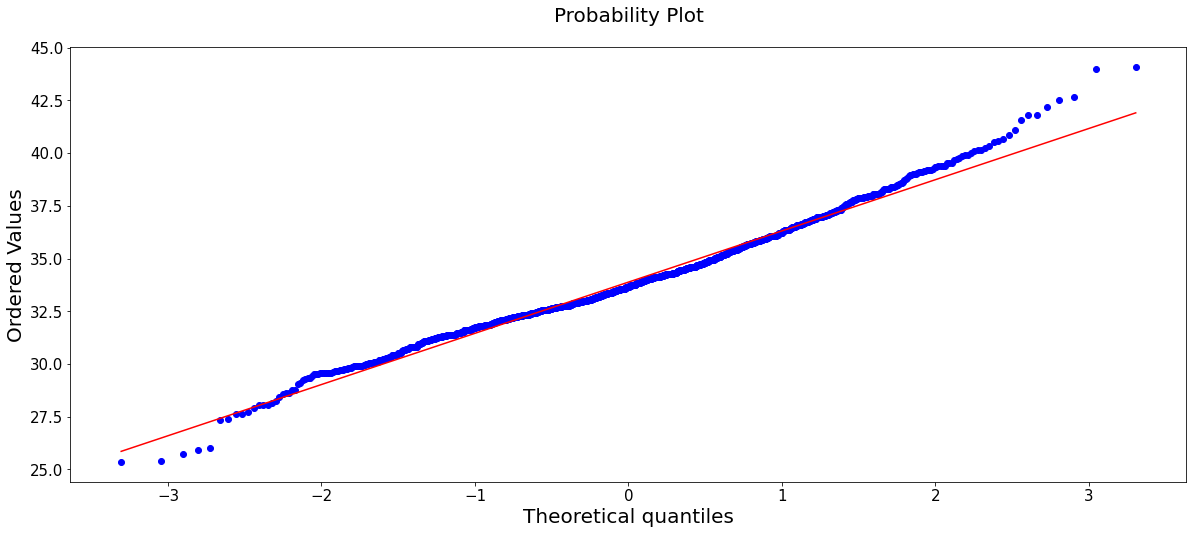

In [45]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. For purposes of this assignment, we will transform our target variable to a  normal distribution. 
***Log-transformation of the target variable***

/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.55 and sigma = 0.07



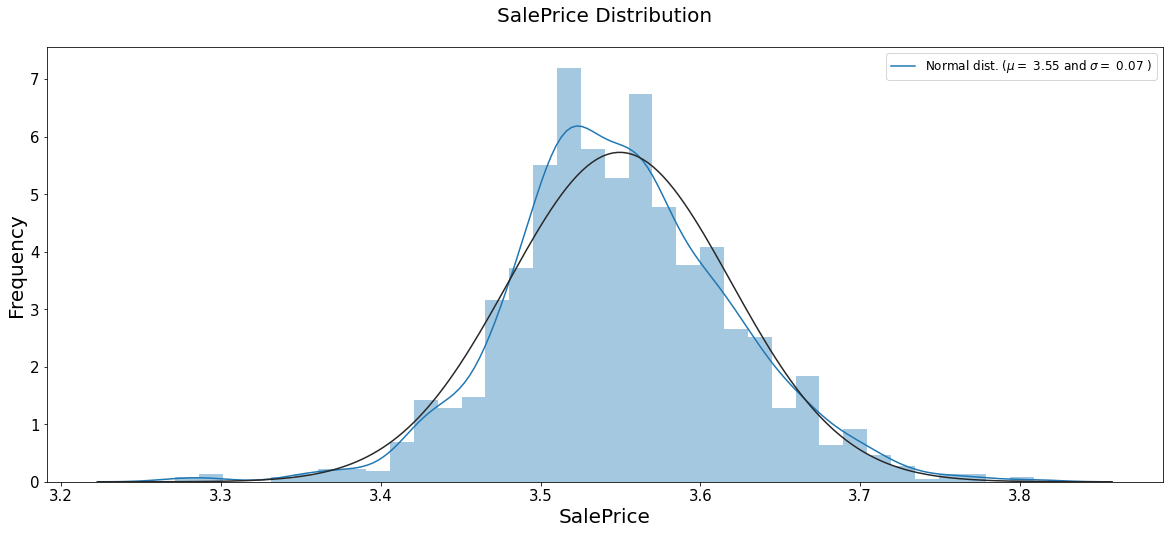

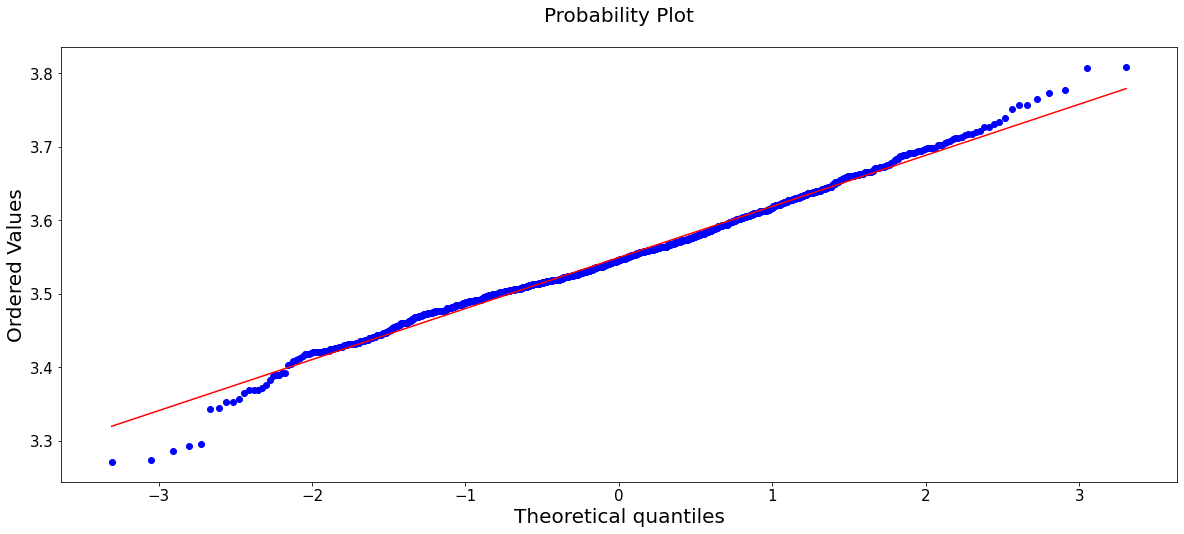

In [46]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

# Multivariate Analysis

### Correlation matrix

<AxesSubplot:>

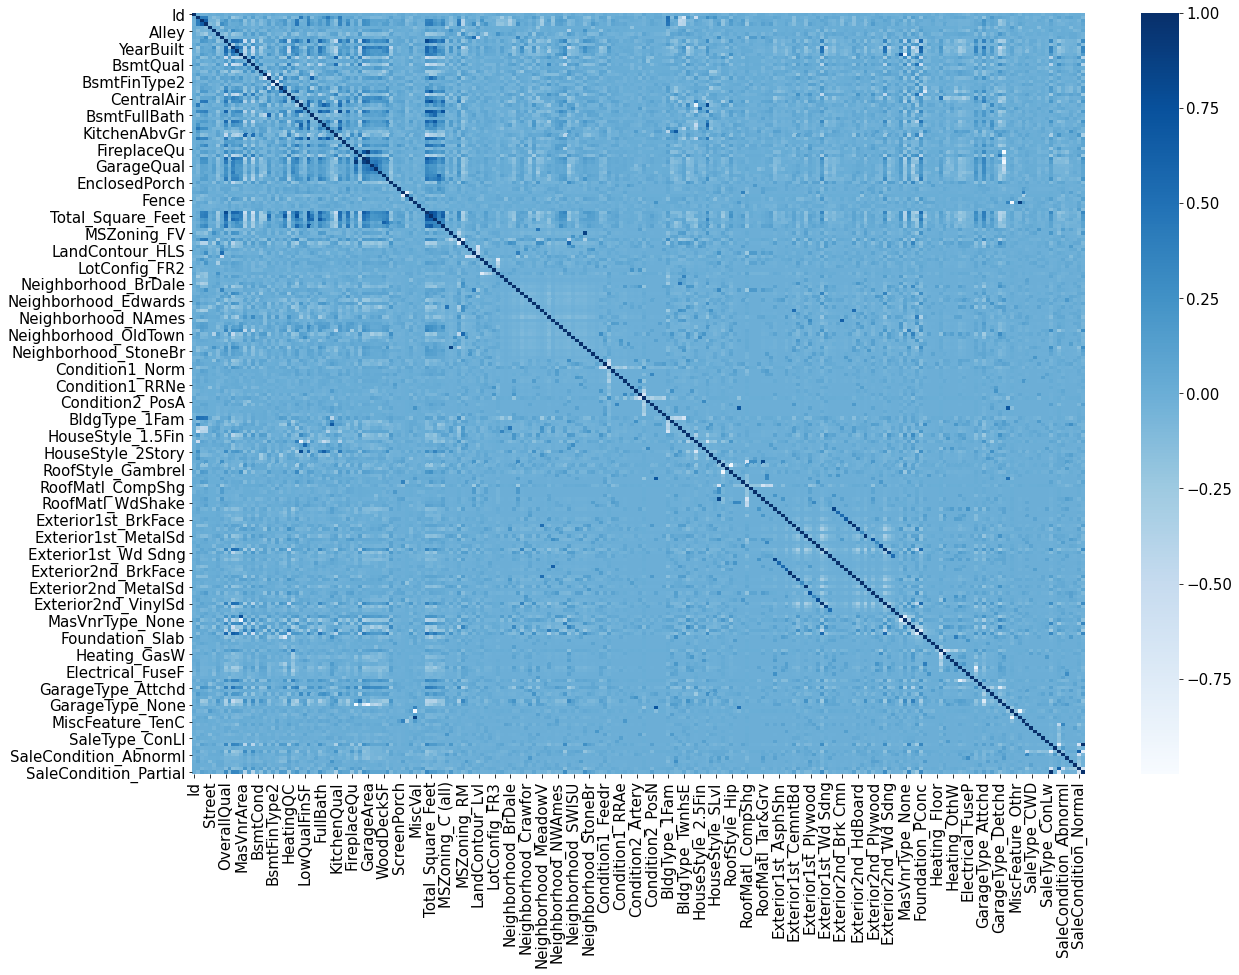

In [47]:
# compute and plot the correlation matrix 
plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr(),cmap='Blues',annot=False) 

<AxesSubplot:>

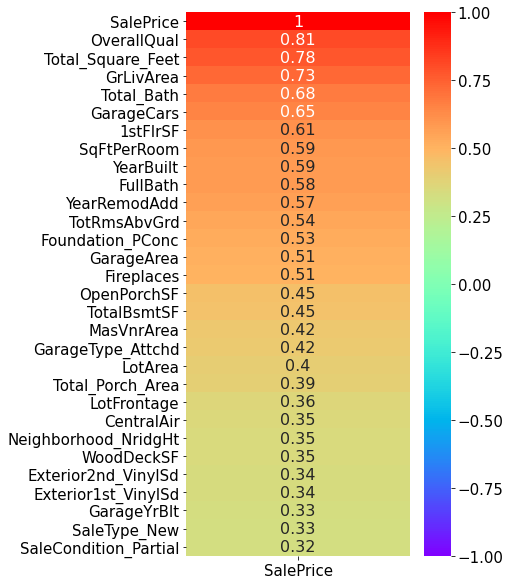

In [48]:
# Checking the corelation beetween the predicted and training column
top_features = df_train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

### Relation Exploration for Few Numerical Variables and categorical features

In [49]:
# Making Function for plotting and checking the relation between two columns 
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.countplot(df_train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.distplot(df_train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

#### Relation Exploration for Few Numerical Variables

/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


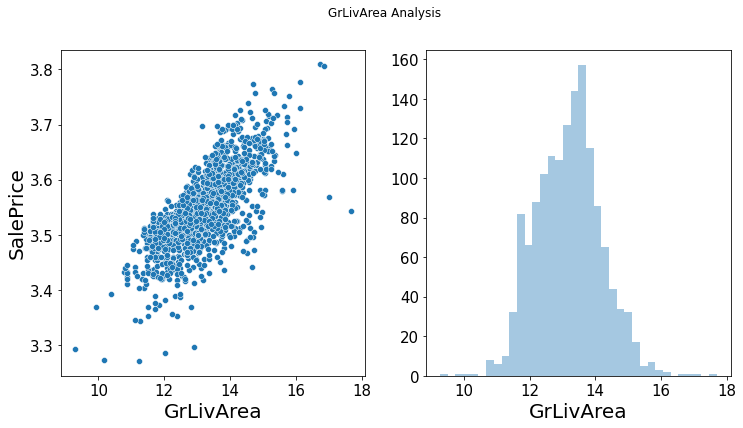

In [50]:
plot_data('GrLivArea')

'GrLivArea' seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases. 

/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


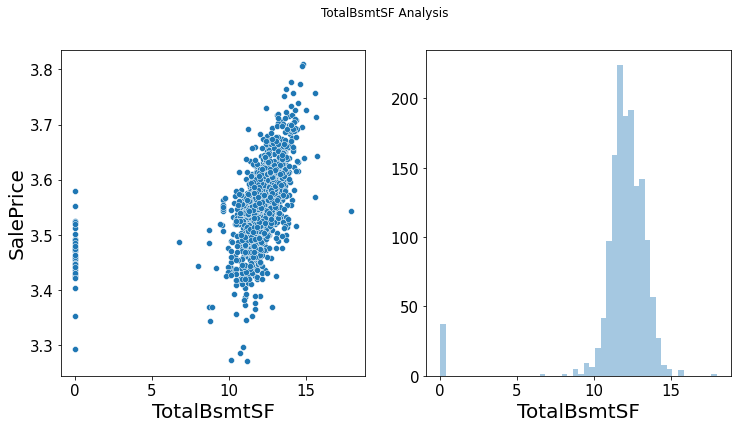

In [51]:
plot_data('TotalBsmtSF')

'TotalBsmtSF' also seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases. However, it has outliers so we need to move them. 

In [52]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 400000)].index)

####  Relation Exploration for categorical features

/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'BsmtFinType2 Analysis')

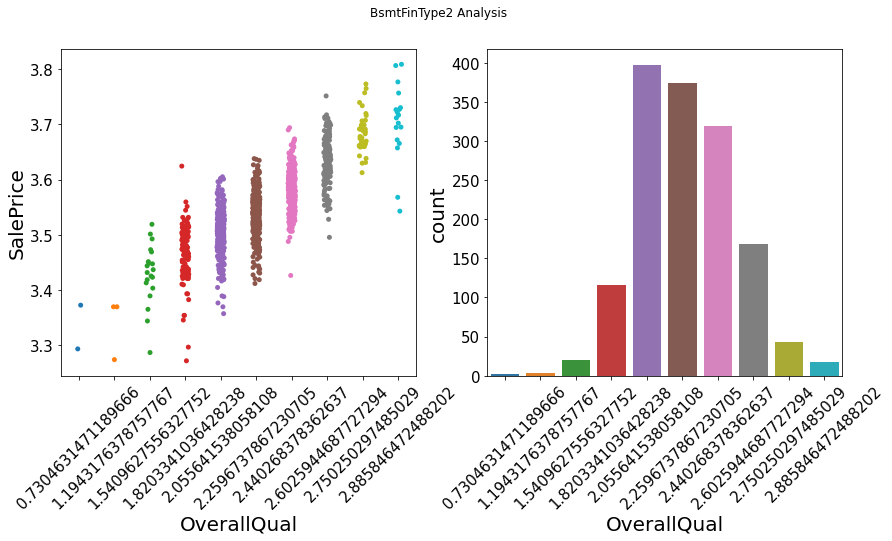

In [53]:
# plot saleprice vs. overallqual
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.stripplot(x='OverallQual', y='SalePrice', data=df_train, ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.countplot(df_train['OverallQual'], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)
fig.suptitle(str(col) + ' Analysis')

In [54]:
# drop off the outliers 
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000)].index)

/Users/julianoquendo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


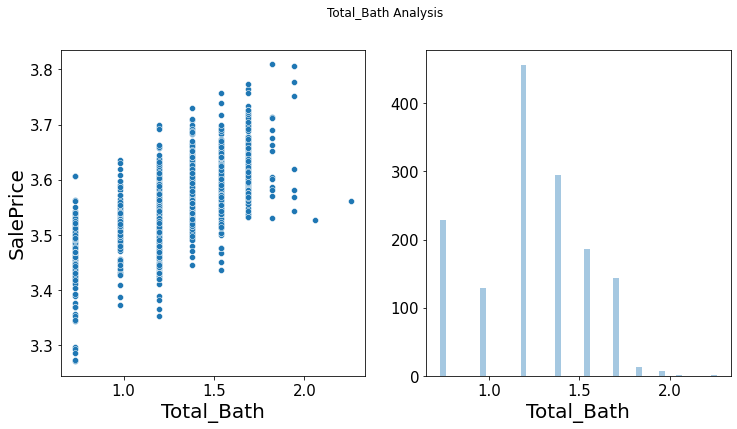

In [55]:
# plot saleprices vs total_bath
plot_data('Total_Bath')

In [56]:
# Dropping the outliers in the data
df_train = df_train.drop(df_train[(df_train['Total_Bath'] > 4) & (df_train['SalePrice'] < 200000)].index)

In [57]:
df_train.reset_index()

,index,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,...,0,0,0,1,0,0,0,0,1,0
1,1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,...,0,0,0,1,0,0,0,0,1,0
2,2,1.540963,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,...,0,0,0,1,0,0,0,0,1,0
3,3,1.820334,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,...,0,0,0,1,1,0,0,0,0,0
4,4,2.055642,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,13.213850,2.750250,5.744420,18.960528,0.730463,0.730463,1.540963,0.0,2.259674,...,0,0,0,1,0,0,0,0,1,0
1456,1456,13.215896,1.820334,6.337529,20.994868,0.730463,0.730463,1.540963,0.0,2.259674,...,0,0,0,1,0,0,0,0,1,0
1457,1457,13.217941,2.885846,5.859551,19.476345,0.730463,0.730463,1.540963,0.0,2.440268,...,0,0,0,1,0,0,0,0,1,0
1458,1458,13.219985,1.820334,5.914940,19.760176,0.730463,0.730463,1.540963,0.0,2.055642,...,0,0,0,1,0,0,0,0,1,0


In [58]:
import scipy.stats as st

In [59]:
# keep this line of code
housing = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/train.csv")
# display data 
housing.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

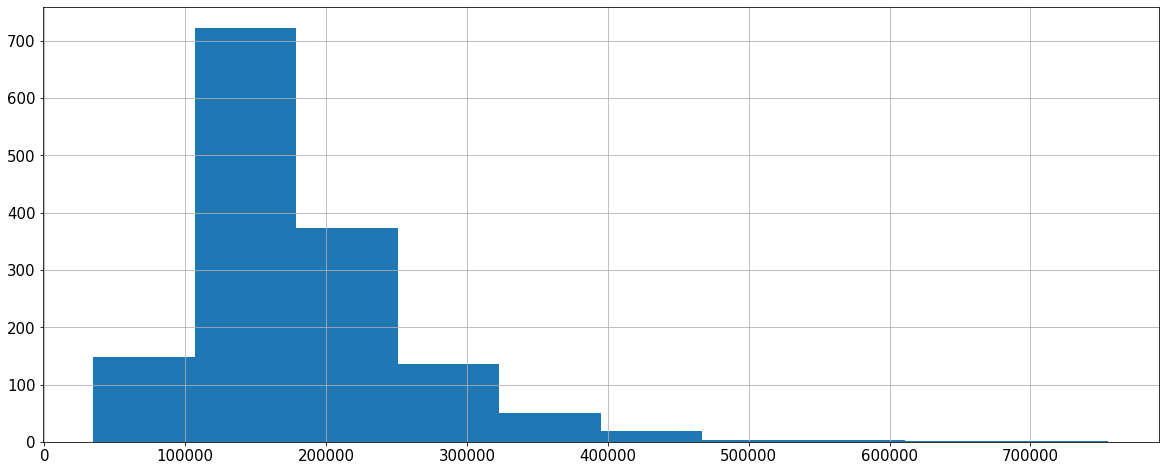

In [60]:
housing['SalePrice'].hist()

Source for
Reference value for national average for housing:
[Statista](https://www.statista.com/statistics/240991/average-sales-prices-of-new-homes-sold-in-the-us/)

In [61]:
st.ttest_1samp(housing['SalePrice'], 222900)

Ttest_1sampResult(statistic=-20.190802084757888, pvalue=3.836863842804523e-80)

In [62]:
housing.groupby(['Neighborhood'])['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [63]:
st.ttest_1samp(housing[housing['Neighborhood']== 'Edwards']['SalePrice'], housing['SalePrice'].mean())

Ttest_1sampResult(statistic=-12.196987594087203, pvalue=1.948997311546059e-21)

In [64]:
housing[housing['Neighborhood']== 'Edwards']['SalePrice'].mean()

128219.7

In [65]:
housing['SalePrice'].mean()

180921.19589041095

In [66]:
ridge = housing[housing['Neighborhood'] == 'NoRidge']
ames = housing[housing['Neighborhood'] == 'NAmes']

In [67]:
st.ttest_ind(ridge['SalePrice'], ames['SalePrice'])

Ttest_indResult(statistic=19.84136920411451, pvalue=2.984467224632914e-54)

In [68]:
ridge['SalePrice'].mean(), ames['SalePrice'].mean()

(335295.31707317074, 145847.08)

In [69]:
for i in housing.select_dtypes('O').columns:
    display(housing[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [70]:
housing['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [71]:
pconc = housing[housing['Foundation'] == 'PConc']['SalePrice']
cblock= housing[housing['Foundation'] == 'CBlock']['SalePrice']

In [72]:
t, p = st.ttest_ind(pconc, cblock)
t, p


(19.153684100959705, 4.295762040126887e-72)

In [73]:
pconc.mean(), cblock.mean()

(225230.44204018547, 149805.714511041)

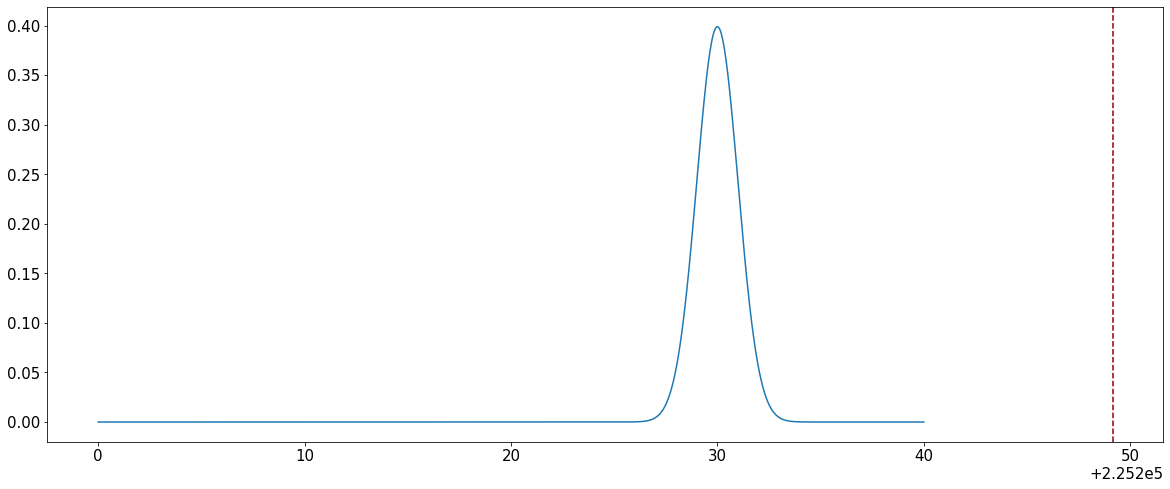

In [74]:
#example of t distribution
points = np.linspace(225200, 225240, 1000)
ypoints= st.t.pdf(x = points, loc= 225230, df= len(pconc) + len(cblock) - 2)


plt.axvline(225230+ t, color= 'darkred', linestyle= '--')
plt.plot(points, ypoints)

In [75]:
pvalues = {}
for i in housing['Foundation'].unique():
    for j in housing['Foundation'].unique():
        pvalues.update({f"{i} to {j}": st.ttest_ind(housing[housing['Foundation'] == i]['SalePrice'], housing[housing['Foundation']== j]['SalePrice'])[1]})

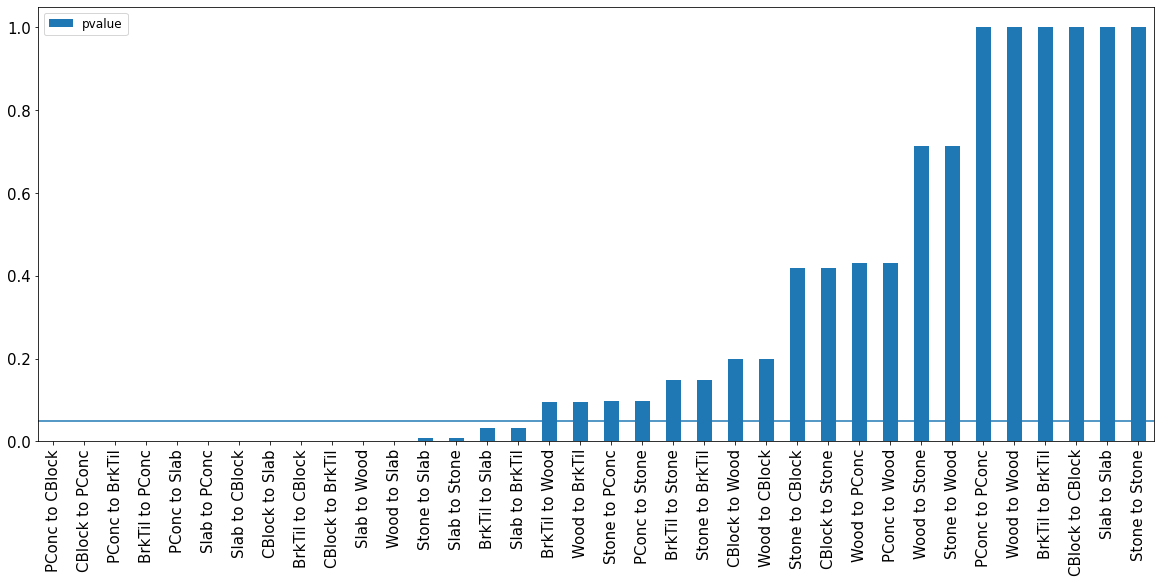

In [76]:
pvalues_df = pd.DataFrame.from_dict(pvalues, orient= 'index').rename({0:'pvalue'}, axis = 1)
pvalues_df.sort_values(by='pvalue').plot(kind='bar')
plt.axhline(0.05)

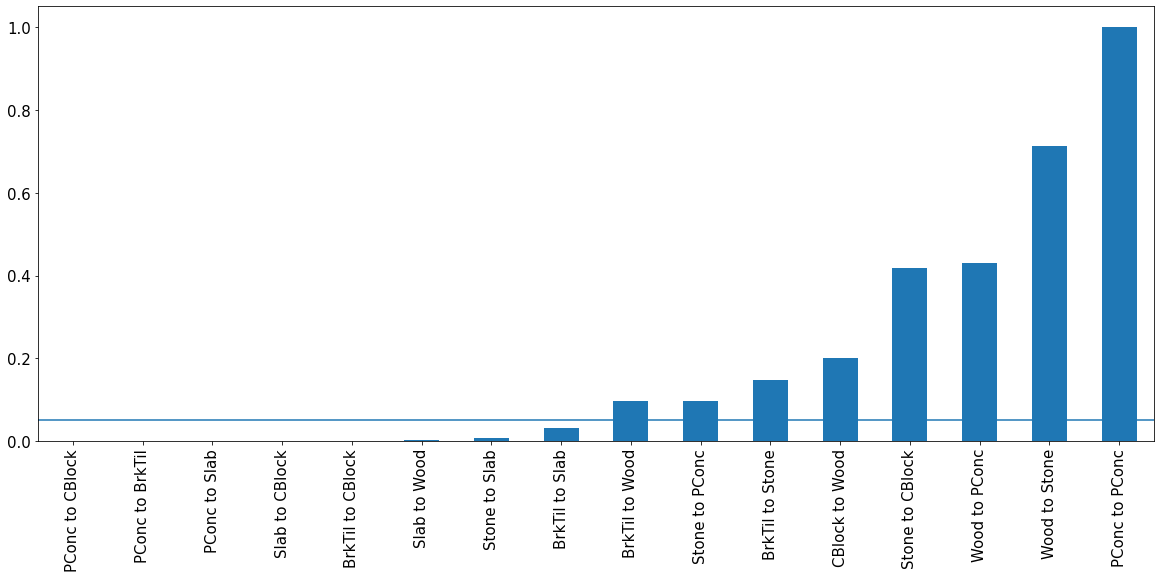

In [77]:
#drop the duplicates
pvalues_df.sort_values(by='pvalue')['pvalue'].drop_duplicates().plot(kind='bar')
plt.axhline(0.05)

<hr style="border:2px solid gray">


<font color='orange'>


<a name= "Step1"></a>
    
## Ensure you've properly connected your dataset and run the previous cells in this notebook. 


### [Ames, Iowa Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [84]:
#for management purposes, let's drop columns with null values in them and select only categorical values
nom_housing = housing.dropna(axis=1).select_dtypes('O')
nom_housing

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [85]:
#what columns do we have 
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSZoning


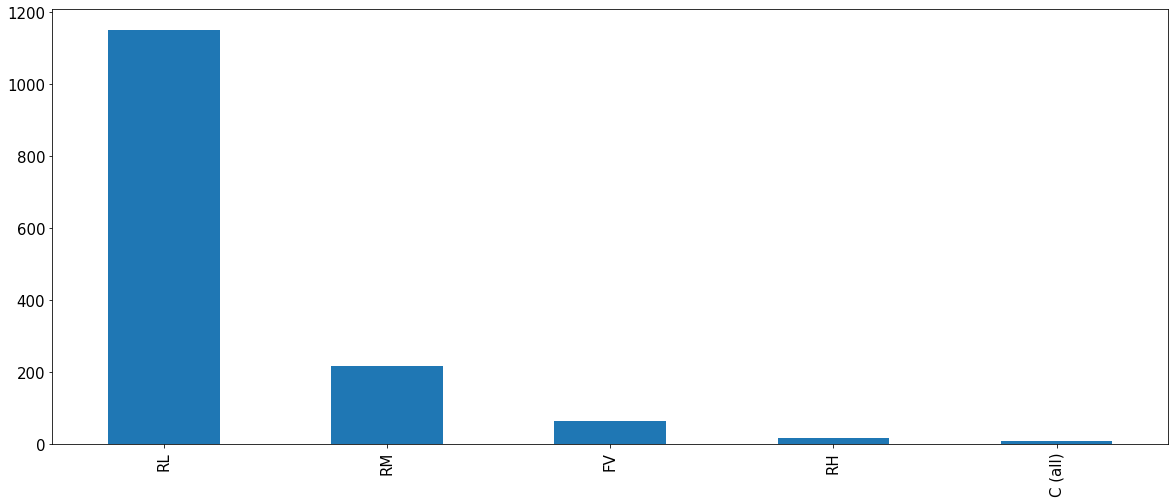

Street


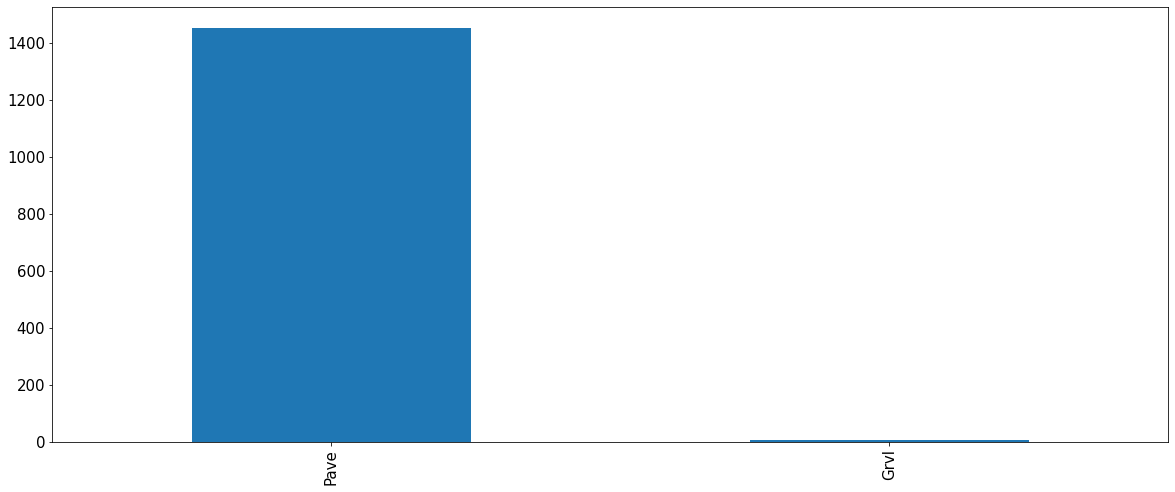

LotShape


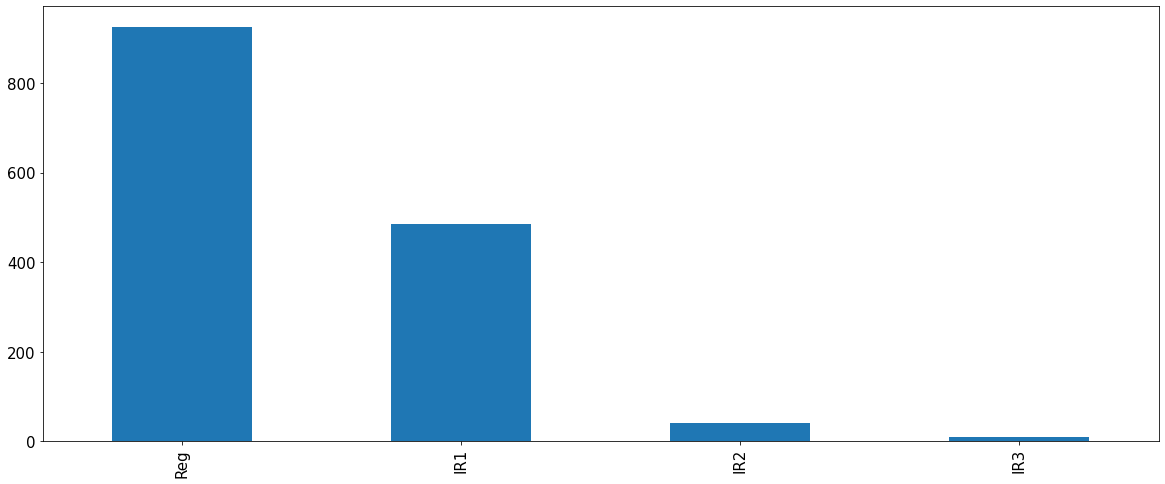

LandContour


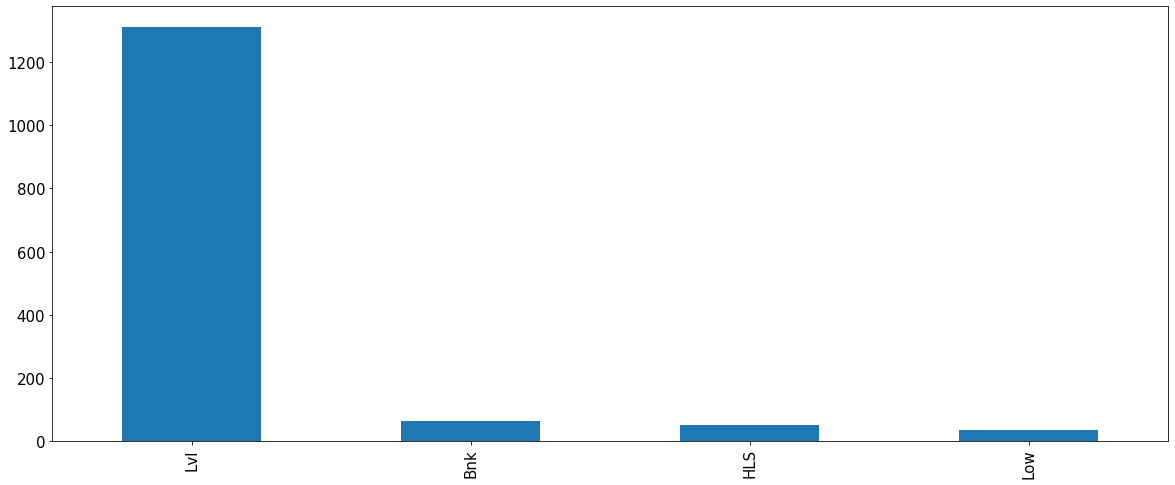

Utilities


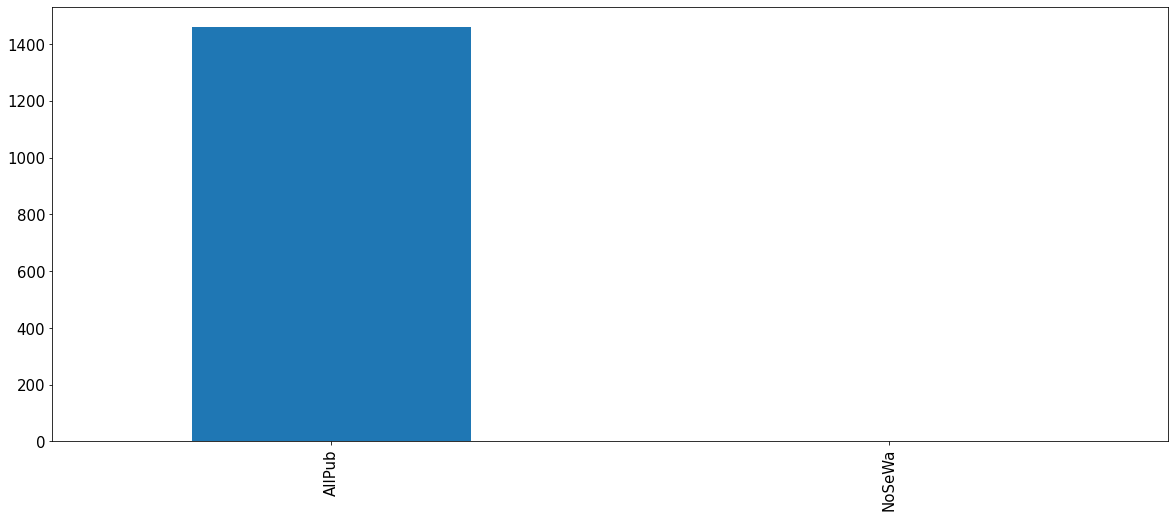

LotConfig


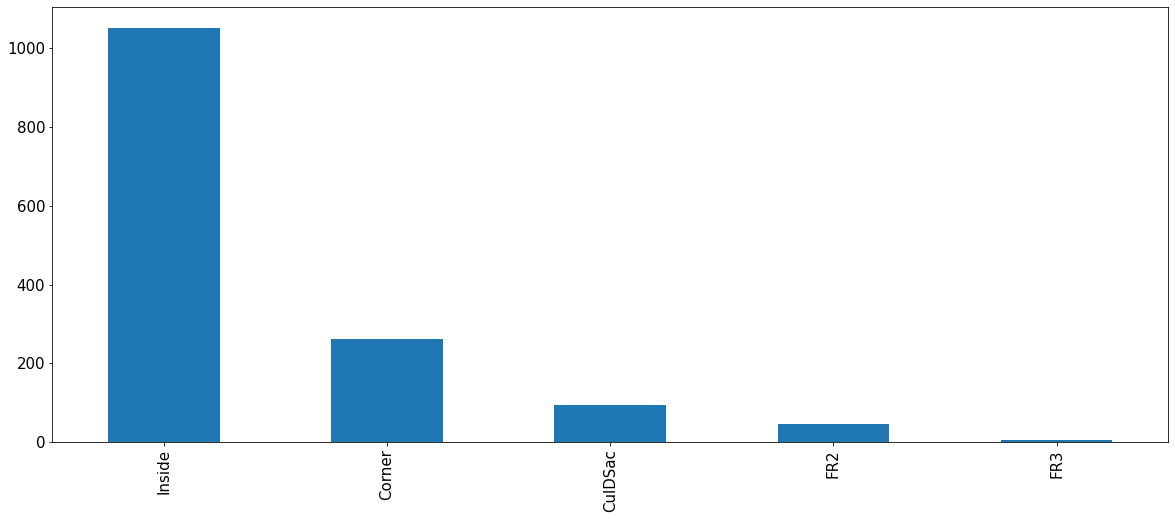

LandSlope


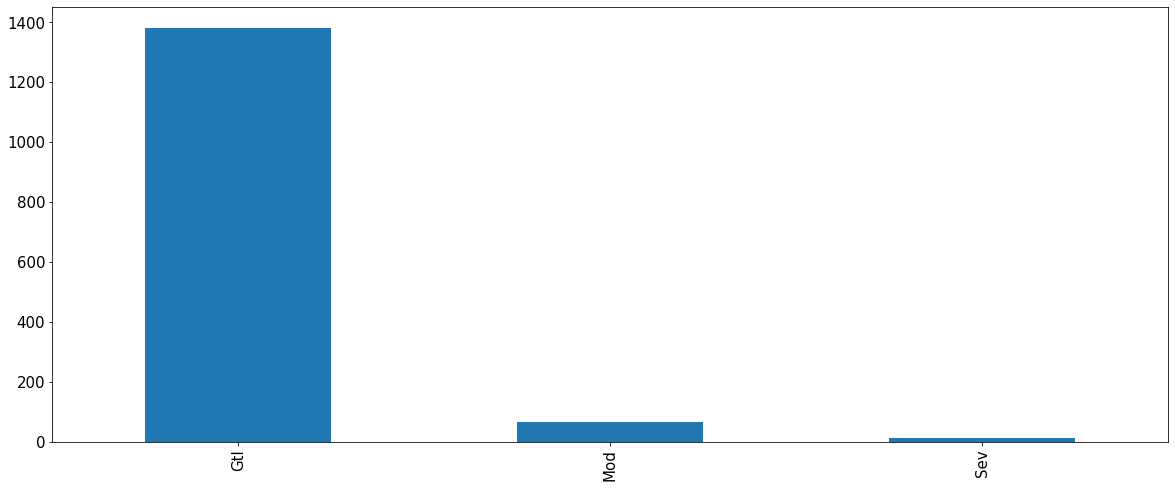

Neighborhood


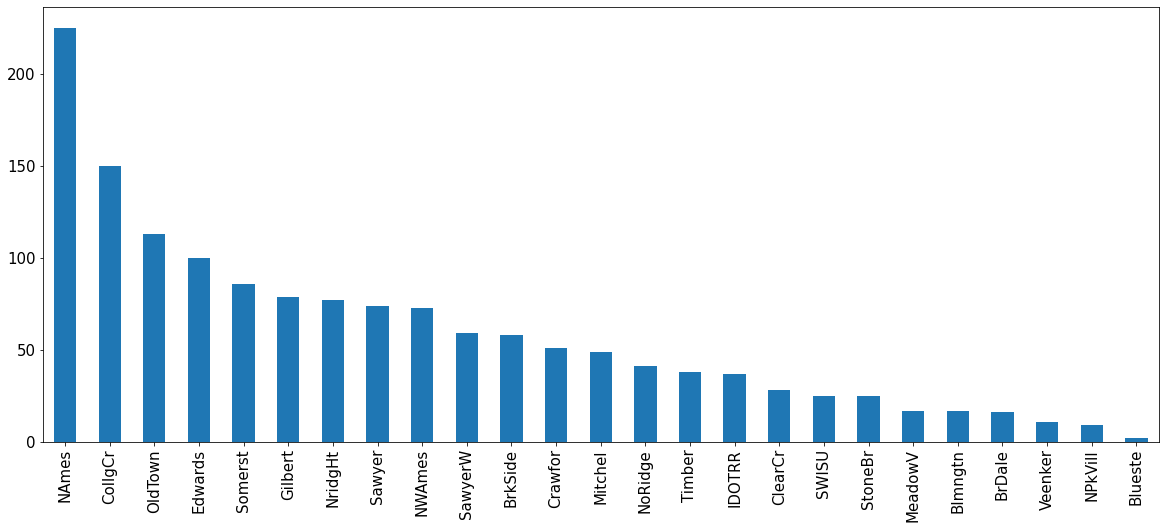

Condition1


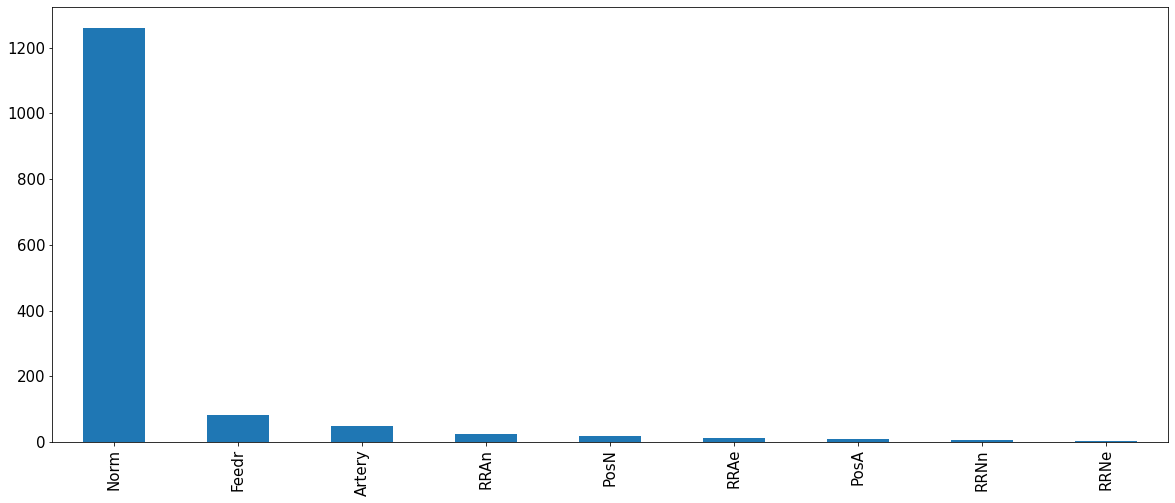

Condition2


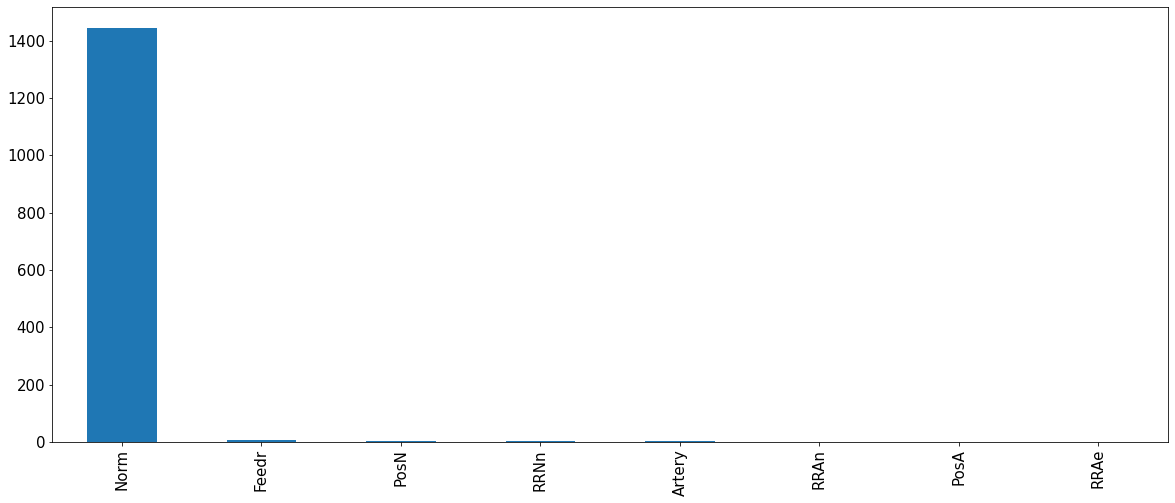

BldgType


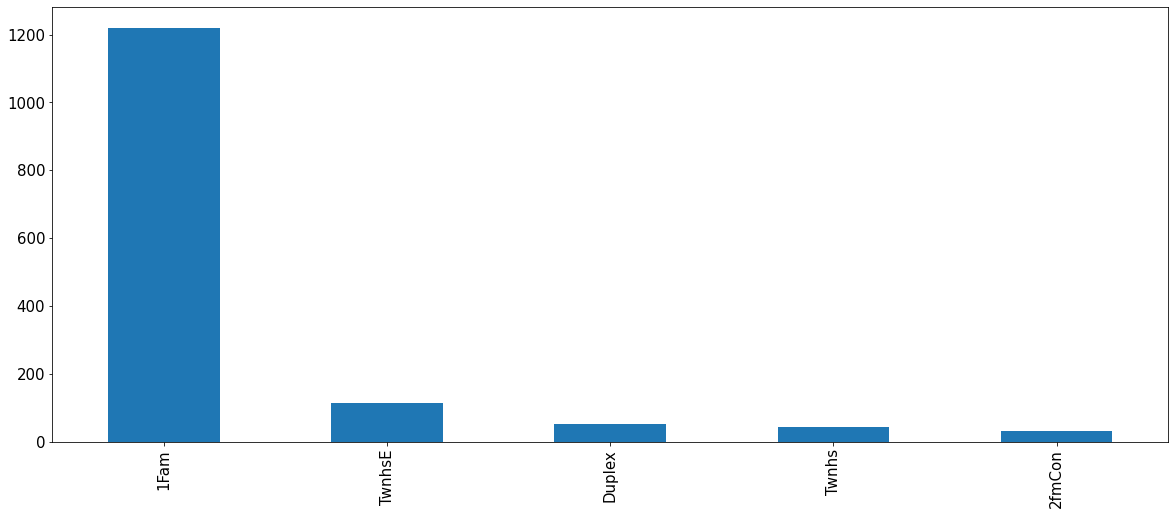

HouseStyle


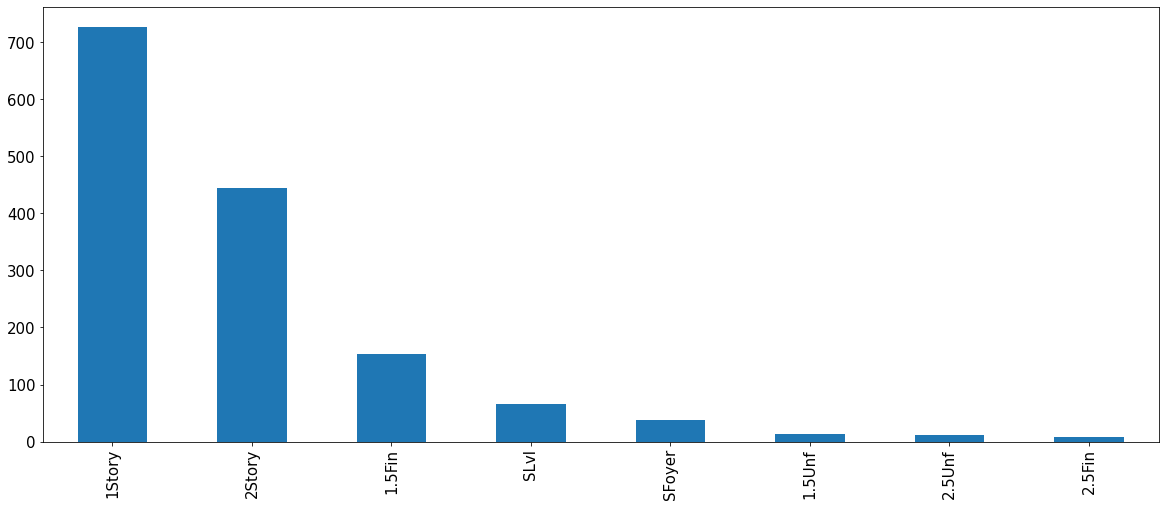

RoofStyle


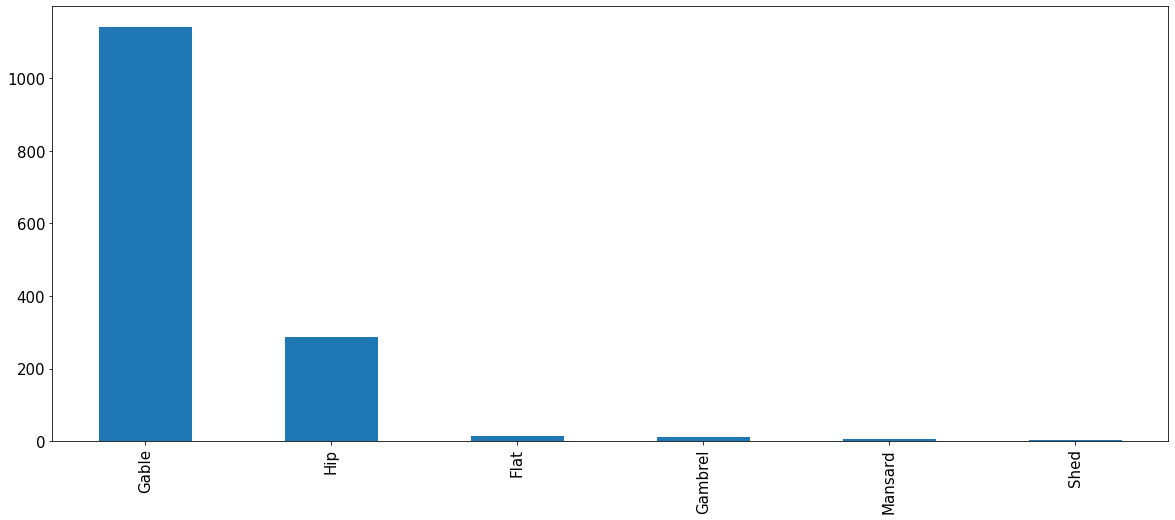

RoofMatl


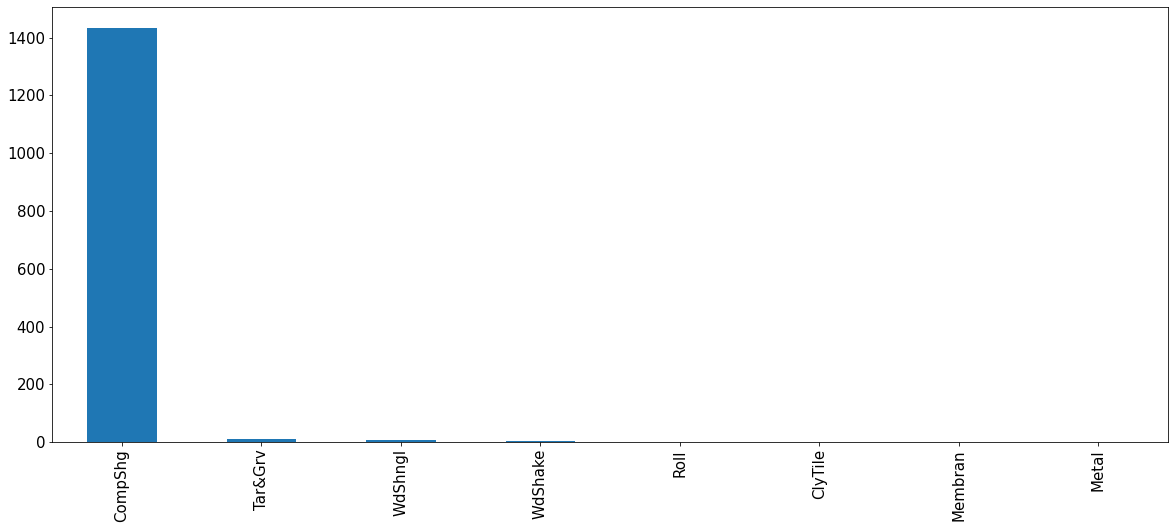

Exterior1st


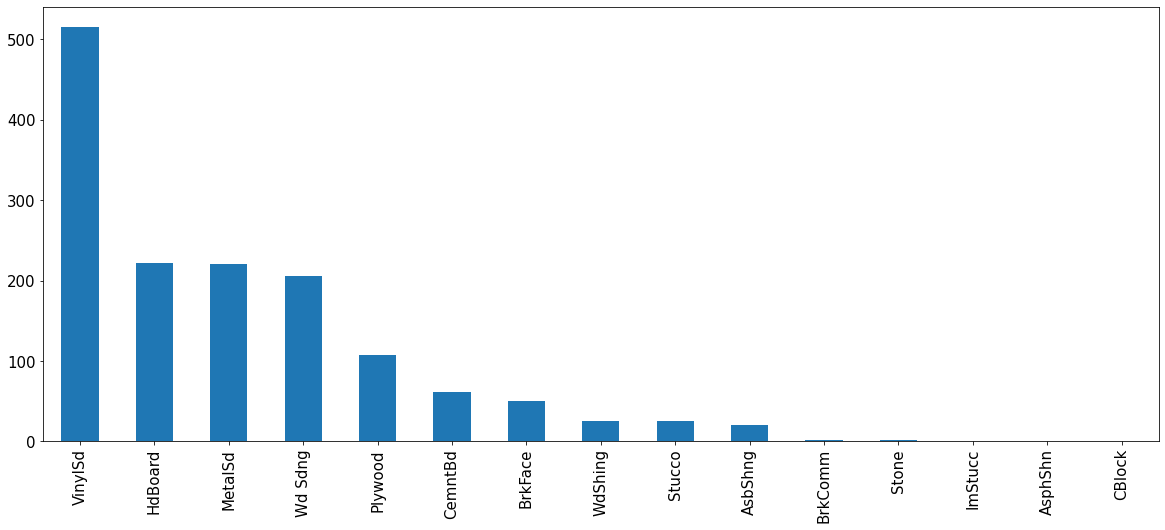

Exterior2nd


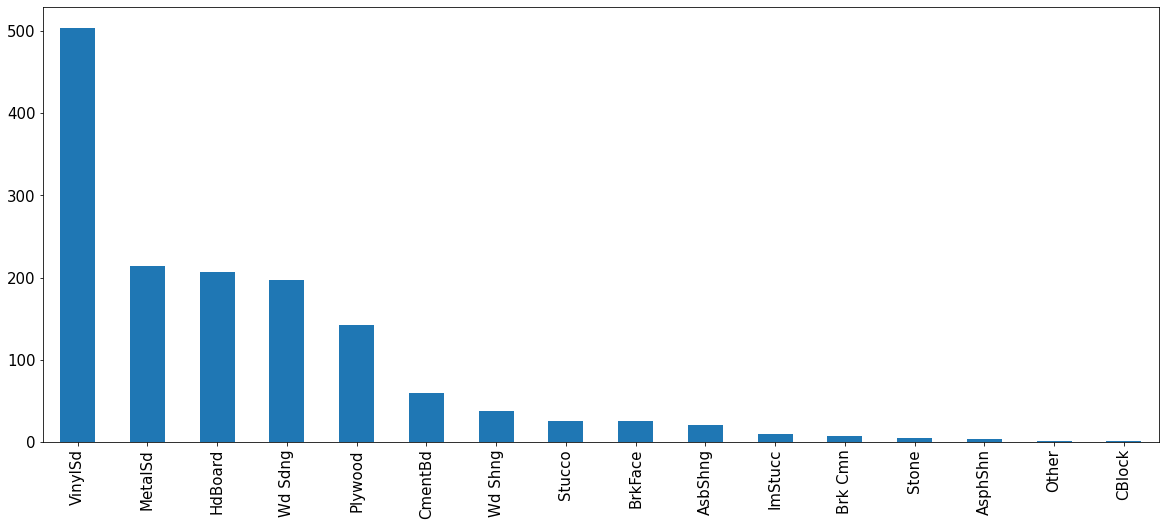

ExterQual


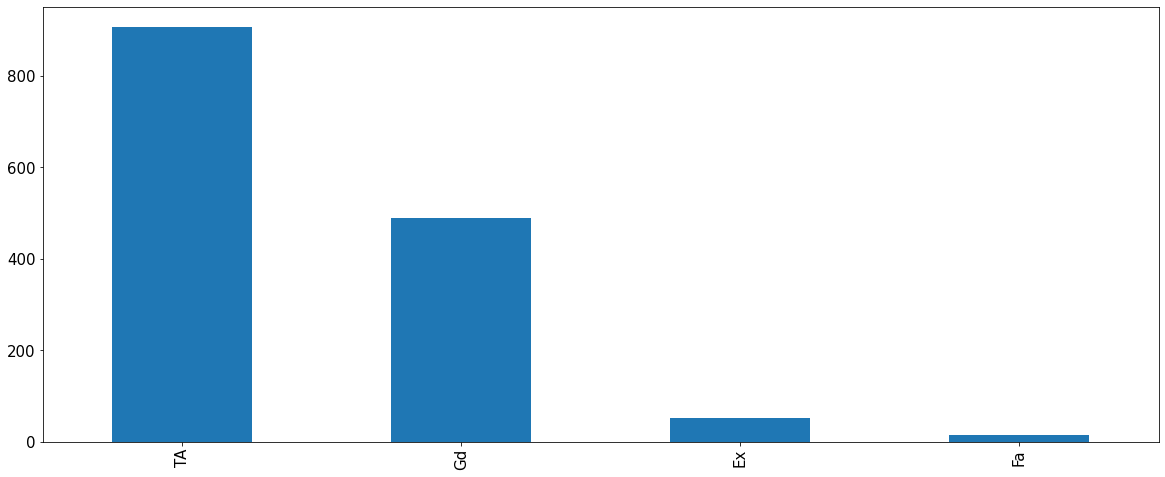

ExterCond


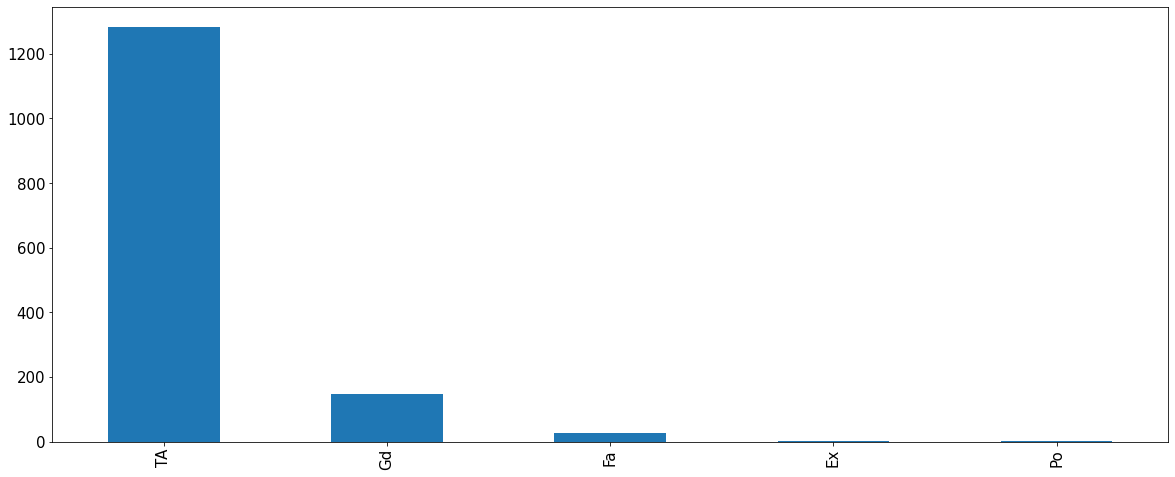

Foundation


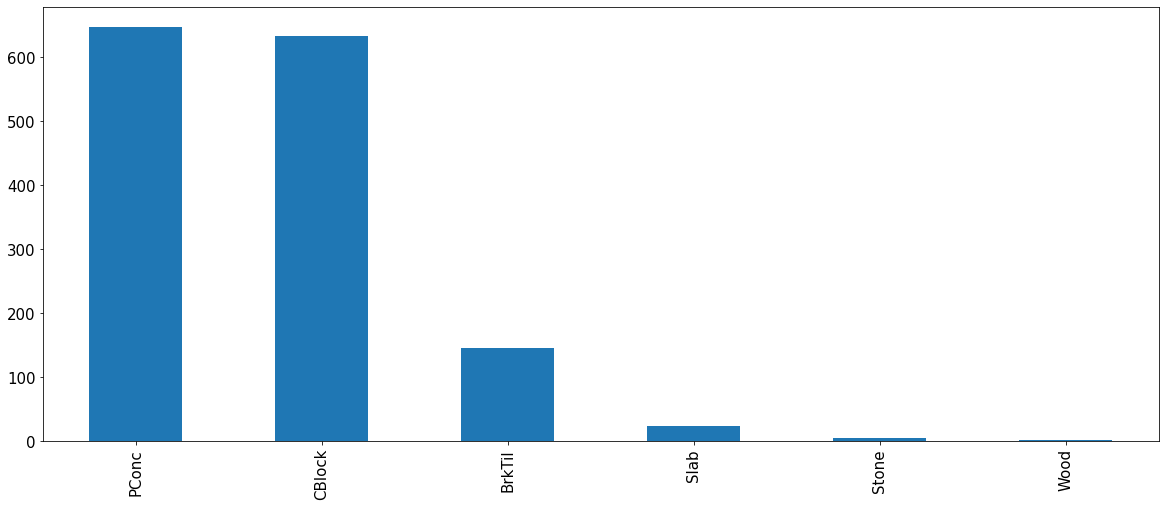

Heating


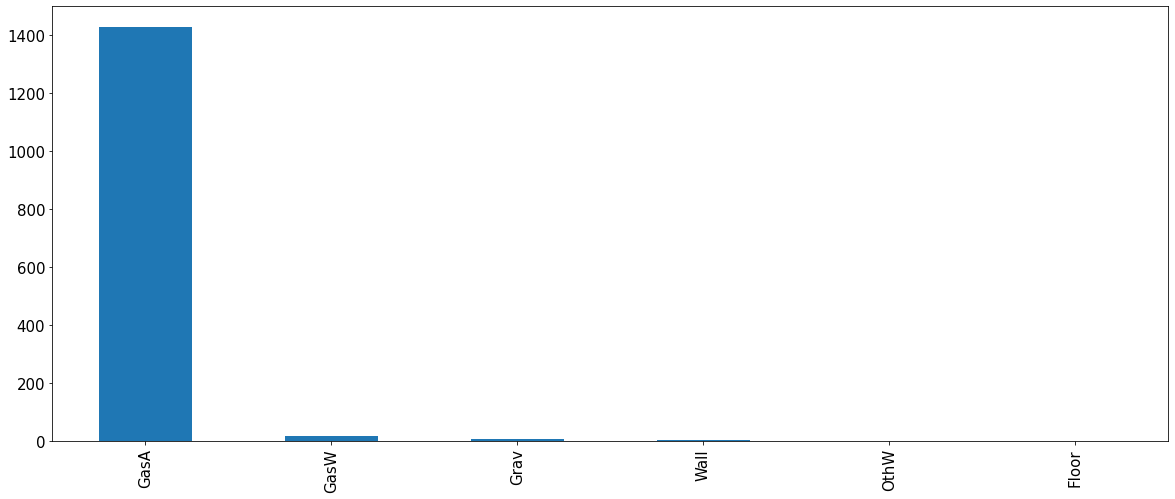

HeatingQC


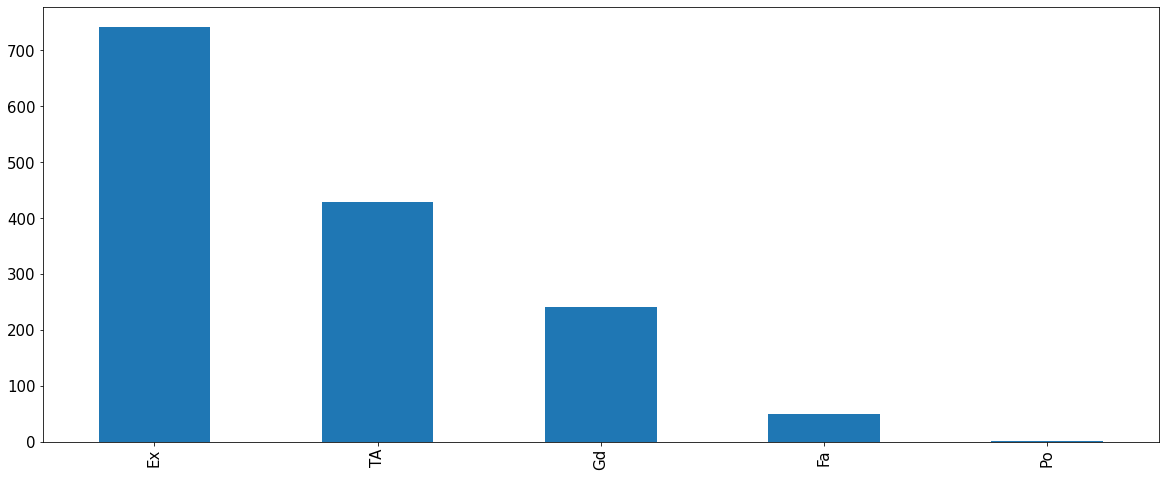

CentralAir


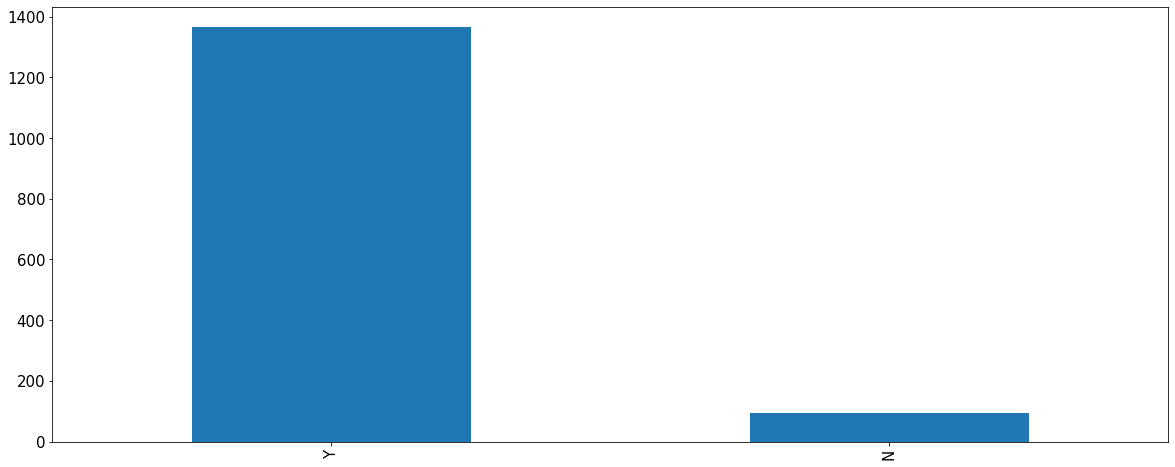

KitchenQual


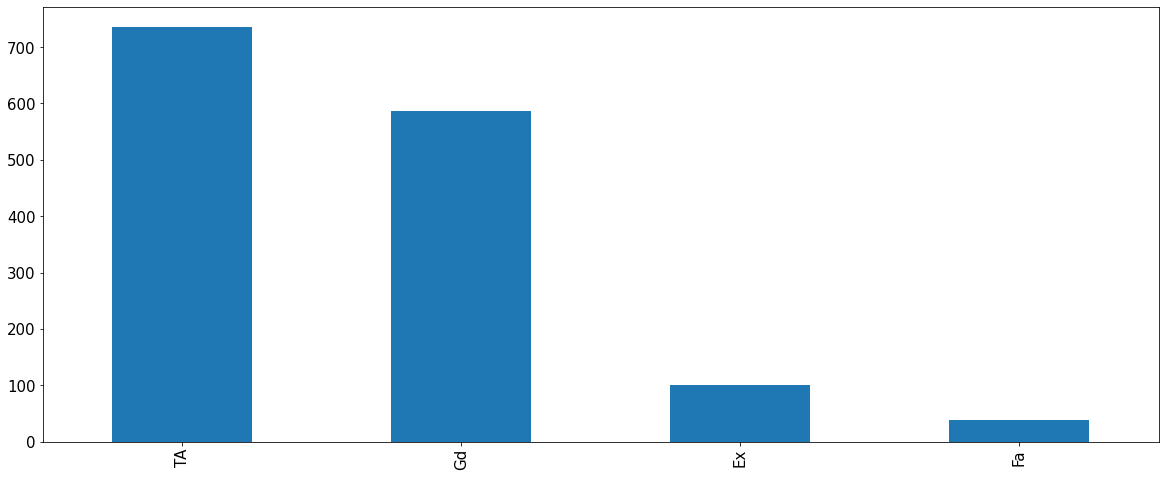

Functional


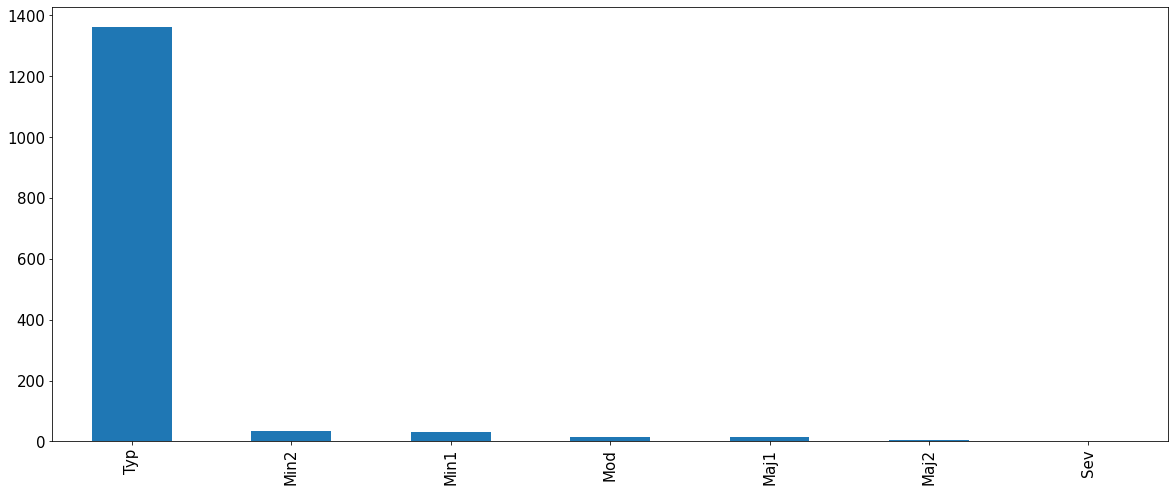

PavedDrive


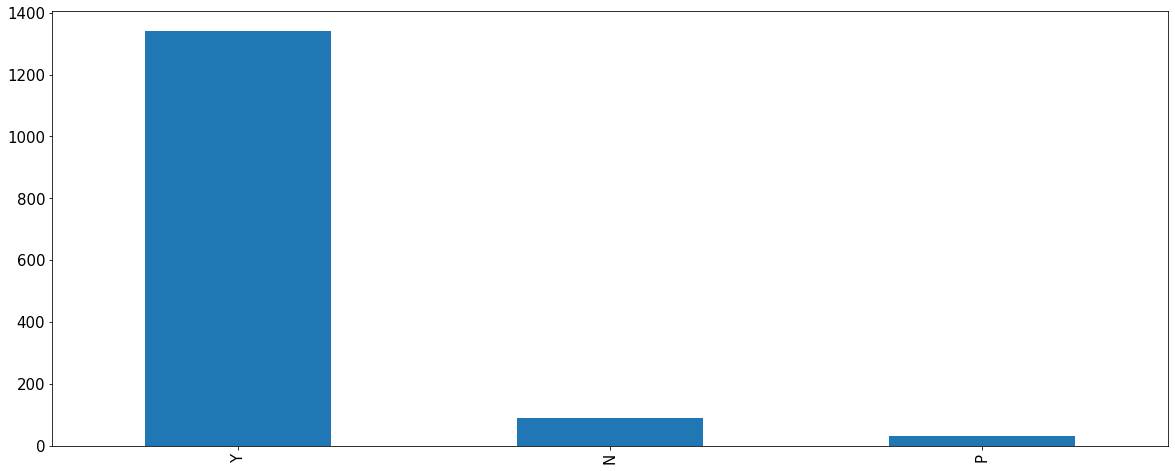

SaleType


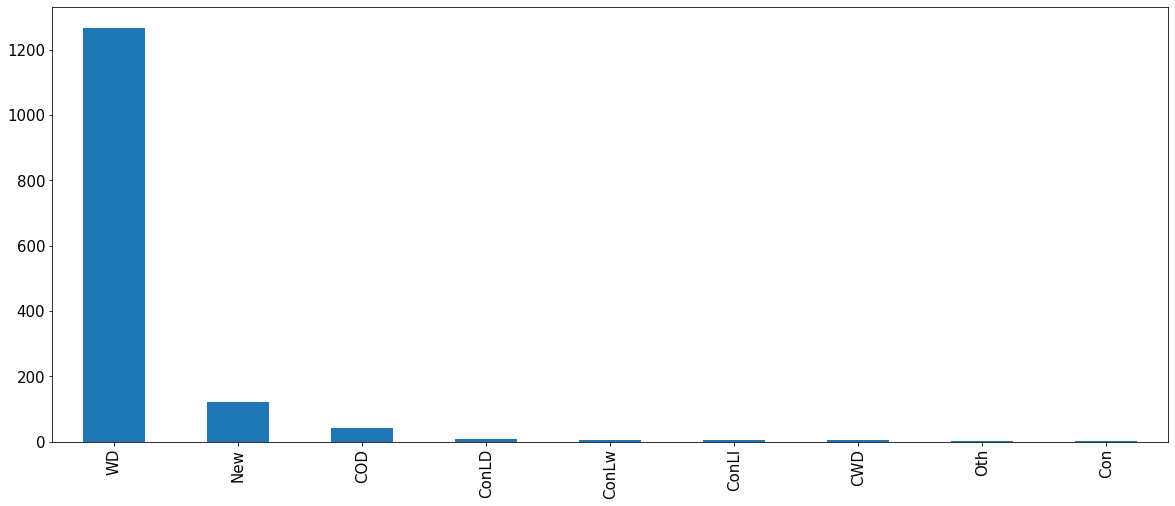

SaleCondition


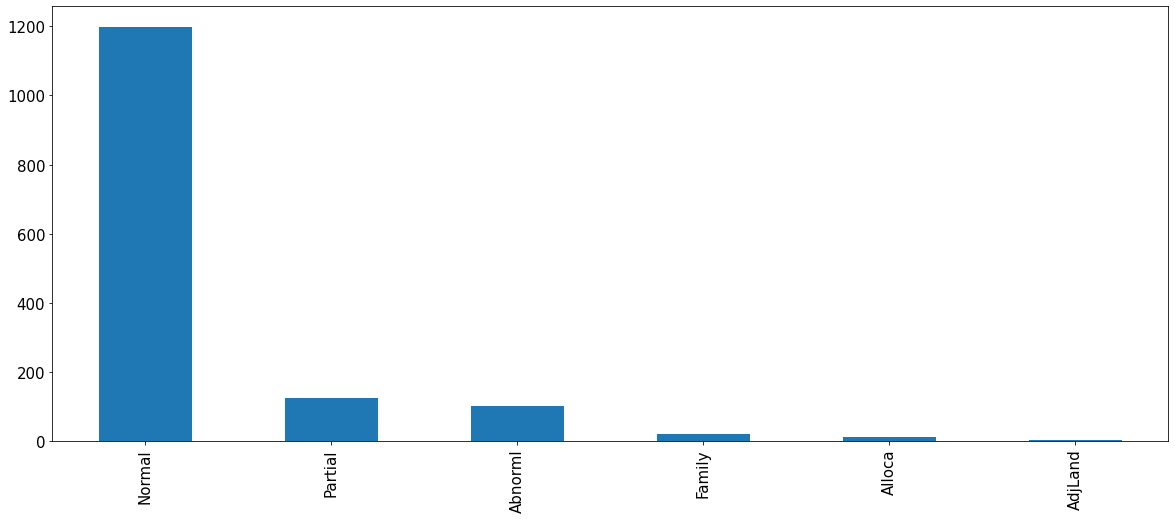

In [95]:
for i in nom_housing:
    nom_housing[i].value_counts().plot(kind='bar')
    print(i)
    plt.show()

In [100]:
cross = pd.crosstab(nom_housing['ExterQual'], nom_housing['ExterCond'])
cross

ExterCond,Ex,Fa,Gd,Po,TA
ExterQual,,,,,
Ex,1,0,3,0,48
Fa,0,6,0,0,8
Gd,0,0,35,0,453
TA,2,22,108,1,773


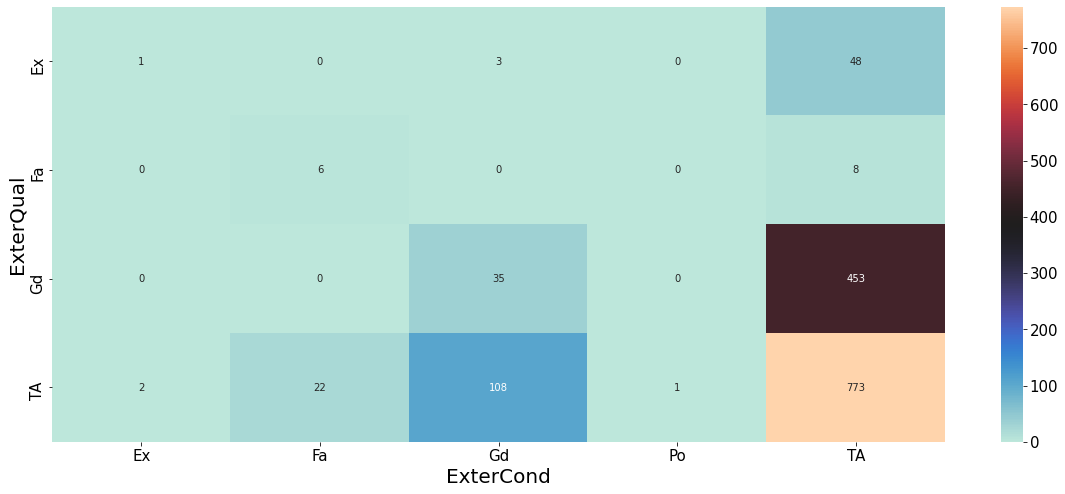

In [121]:


sns.heatmap(cross, annot= True, cmap= 'icefire', fmt ='g');


In [122]:
cross = pd.crosstab(nom_housing['ExterQual'], nom_housing['ExterCond'])
st.chi2_contingency(cross)

(156.2895311162874,
 2.9908872405484838e-27,
 12,
 array([[1.06849315e-01, 9.97260274e-01, 5.20000000e+00, 3.56164384e-02,
         4.56602740e+01],
        [2.87671233e-02, 2.68493151e-01, 1.40000000e+00, 9.58904110e-03,
         1.22931507e+01],
        [1.00273973e+00, 9.35890411e+00, 4.88000000e+01, 3.34246575e-01,
         4.28504110e+02],
        [1.86164384e+00, 1.73753425e+01, 9.06000000e+01, 6.20547945e-01,
         7.95542466e+02]]))

<AxesSubplot:>

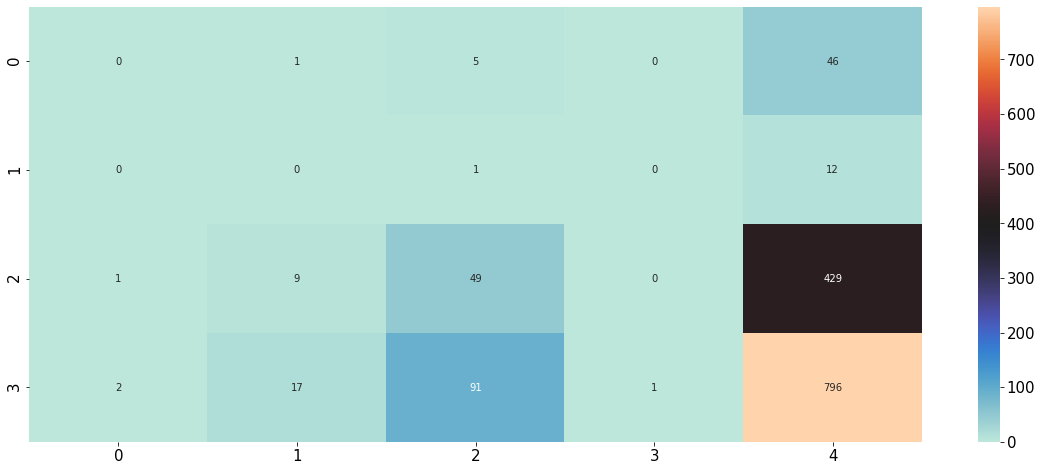

In [126]:
#showcase the results in a heatmap as well
cross_results = pd.DataFrame(st.chi2_contingency(cross)[3]).round()
sns.heatmap(cross_results, cmap= 'icefire', fmt = 'g', annot=True)

In [131]:
round(2.9908872405484838e-27)

0

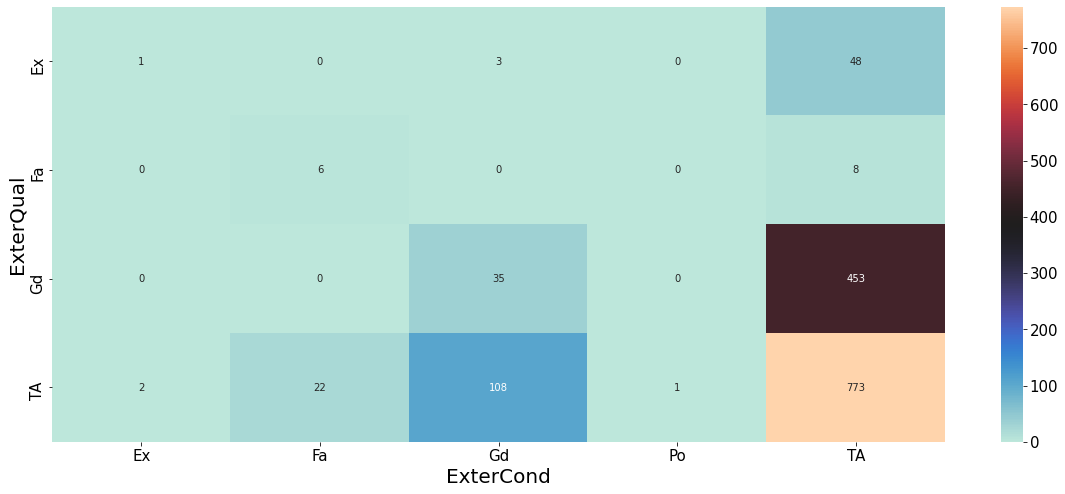

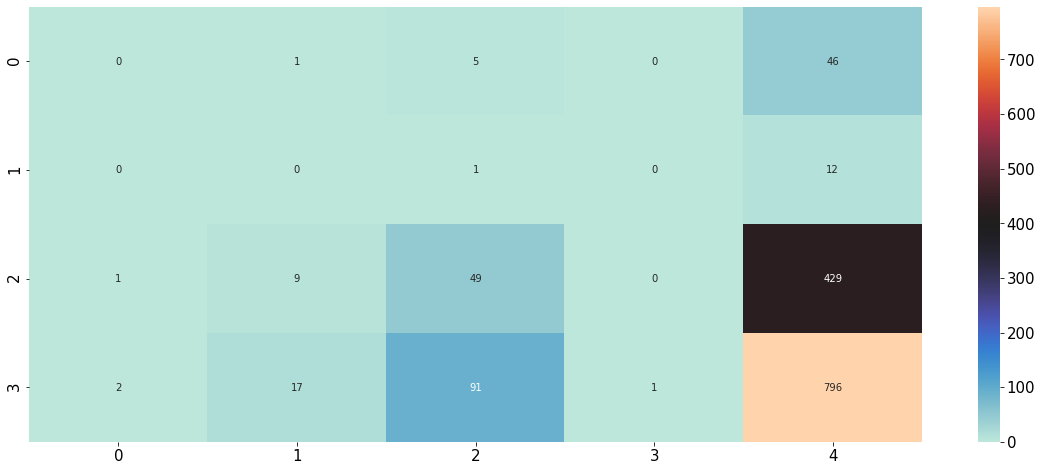

Features ExterQual & ExterCond are not independent of each other.


In [142]:
#build function
def contingency_tester(a, b):
    
    cross = pd.crosstab(nom_housing[a], nom_housing[b])
    results= st.chi2_contingency(cross)
    cross_results = pd.DataFrame(results[3]).round()
    sns.heatmap(cross, cmap = 'icefire', fmt ='g', annot=True)
    plt.show()
    sns.heatmap(cross_results, cmap= 'icefire', fmt = 'g', annot=True)
    plt.show()
    
    if results[1] < 0.05:
        print(f'Features {a} & {b} are not independent of each other.')
    else:
        print("We fail to reject tne null hypothesis.")

contingency_tester('ExterQual', 'ExterCond')

In [143]:
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

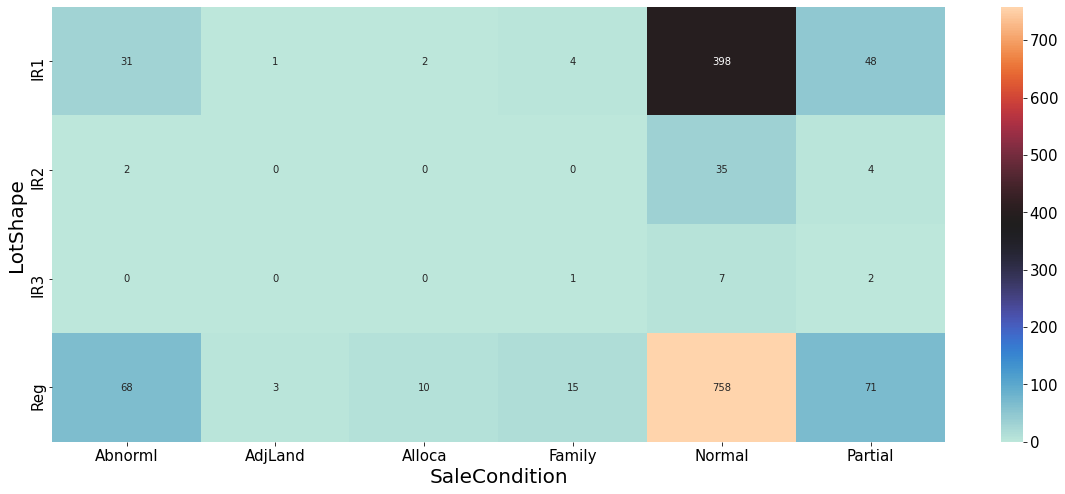

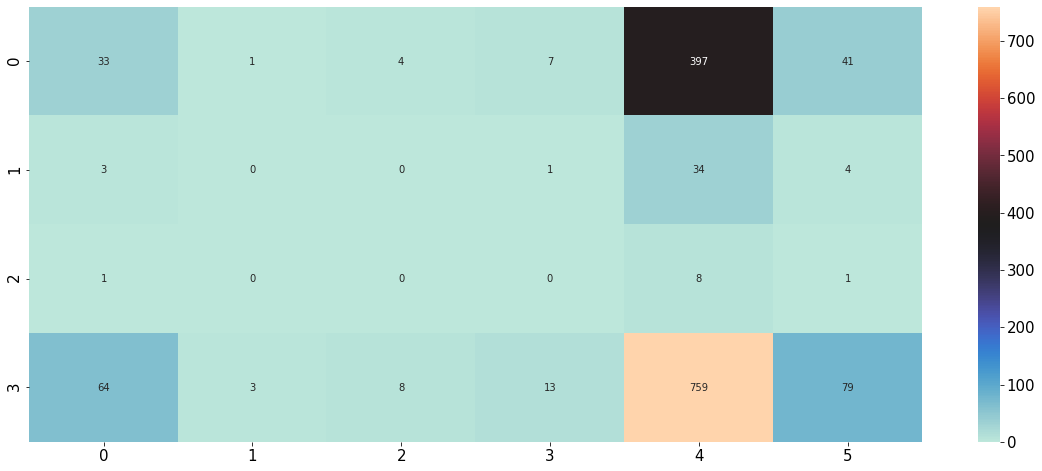

We fail to reject tne null hypothesis.


In [149]:
#an example of a fail to reject
contingency_tester('LotShape', 'SaleCondition')

In [150]:
pvalues= {}
for i in nom_housing.columns:
    for j in nom_housing.columns:
        crosstab = pd.crosstab(nom_housing[i], nom_housing[j])
        pvalue_result = st.chi2_contingency(crosstab)[1]
        pvalues.update({f"{i} to {j}": pvalue_result})
        

In [151]:
pvalues

{'MSZoning to MSZoning': 0.0,
 'MSZoning to Street': 1.293331100878627e-19,
 'MSZoning to LotShape': 1.3596271487657125e-18,
 'MSZoning to LandContour': 6.221391677574749e-08,
 'MSZoning to Utilities': 0.9917472273613425,
 'MSZoning to LotConfig': 0.0008462386541660305,
 'MSZoning to LandSlope': 0.0033192548652162743,
 'MSZoning to Neighborhood': 0.0,
 'MSZoning to Condition1': 0.0012526063553187693,
 'MSZoning to Condition2': 0.010464552603100549,
 'MSZoning to BldgType': 1.7470289640148326e-38,
 'MSZoning to HouseStyle': 6.69732027767283e-33,
 'MSZoning to RoofStyle': 0.00016049868887920847,
 'MSZoning to RoofMatl': 0.9999974089619902,
 'MSZoning to Exterior1st': 1.0801339891685153e-24,
 'MSZoning to Exterior2nd': 4.408207736287896e-27,
 'MSZoning to ExterQual': 3.212044230788349e-49,
 'MSZoning to ExterCond': 9.589790454802117e-06,
 'MSZoning to Foundation': 4.0712487035347877e-54,
 'MSZoning to Heating': 0.01063821350422319,
 'MSZoning to HeatingQC': 2.0540067093628432e-13,
 'MSZon

In [158]:
#let's clean up these results
pval_df = pd.DataFrame.from_dict(pvalues, orient = 'index').rename(columns={0:'values'})
pval_df

,values
MSZoning to MSZoning,0.000000e+00
MSZoning to Street,1.293331e-19
MSZoning to LotShape,1.359627e-18
MSZoning to LandContour,6.221392e-08
MSZoning to Utilities,9.917472e-01
...,...
SaleCondition to KitchenQual,1.445136e-36
SaleCondition to Functional,2.120077e-01
SaleCondition to PavedDrive,5.899112e-06
SaleCondition to SaleType,0.000000e+00


In [166]:
pval_df[pval_df['values'] < 0.05].drop_duplicates()

Index(['MSZoning to MSZoning', 'MSZoning to Street', 'MSZoning to LotShape',
       'MSZoning to LandContour', 'MSZoning to LotConfig',
       'MSZoning to LandSlope', 'MSZoning to Condition1',
       'MSZoning to Condition2', 'MSZoning to BldgType',
       'MSZoning to HouseStyle',
       ...
       'SaleType to ExterCond', 'SaleType to Foundation',
       'SaleType to Heating', 'SaleType to PavedDrive',
       'SaleCondition to Utilities', 'SaleCondition to Neighborhood',
       'SaleCondition to BldgType', 'SaleCondition to RoofStyle',
       'SaleCondition to Exterior1st', 'SaleCondition to PavedDrive'],
      dtype='object', length=351)

In [167]:
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [170]:
#simpler to know your target
pvalues= {}
for i in nom_housing.columns:
    crosstab = pd.crosstab(nom_housing[i], nom_housing['SaleCondition'])
    pvalue_result = st.chi2_contingency(crosstab)[1]
    pvalues.update({f"{i} to Sale Condition": pvalue_result})
pvalues

{'MSZoning to Sale Condition': 9.909275301032864e-18,
 'Street to Sale Condition': 0.0015941181470109059,
 'LotShape to Sale Condition': 0.44951400522655577,
 'LandContour to Sale Condition': 3.127842122859085e-08,
 'Utilities to Sale Condition': 0.019392451705845106,
 'LotConfig to Sale Condition': 0.1412358459106945,
 'LandSlope to Sale Condition': 0.16689881387109506,
 'Neighborhood to Sale Condition': 5.576778295496307e-43,
 'Condition1 to Sale Condition': 0.7515056962768671,
 'Condition2 to Sale Condition': 0.7173338972676411,
 'BldgType to Sale Condition': 3.332216625027881e-23,
 'HouseStyle to Sale Condition': 1.626510734741343e-06,
 'RoofStyle to Sale Condition': 6.46874040763e-08,
 'RoofMatl to Sale Condition': 0.008029726968023709,
 'Exterior1st to Sale Condition': 2.028676077157548e-28,
 'Exterior2nd to Sale Condition': 5.394584248657454e-24,
 'ExterQual to Sale Condition': 3.0712518093162877e-46,
 'ExterCond to Sale Condition': 0.018134747425577774,
 'Foundation to Sale Con

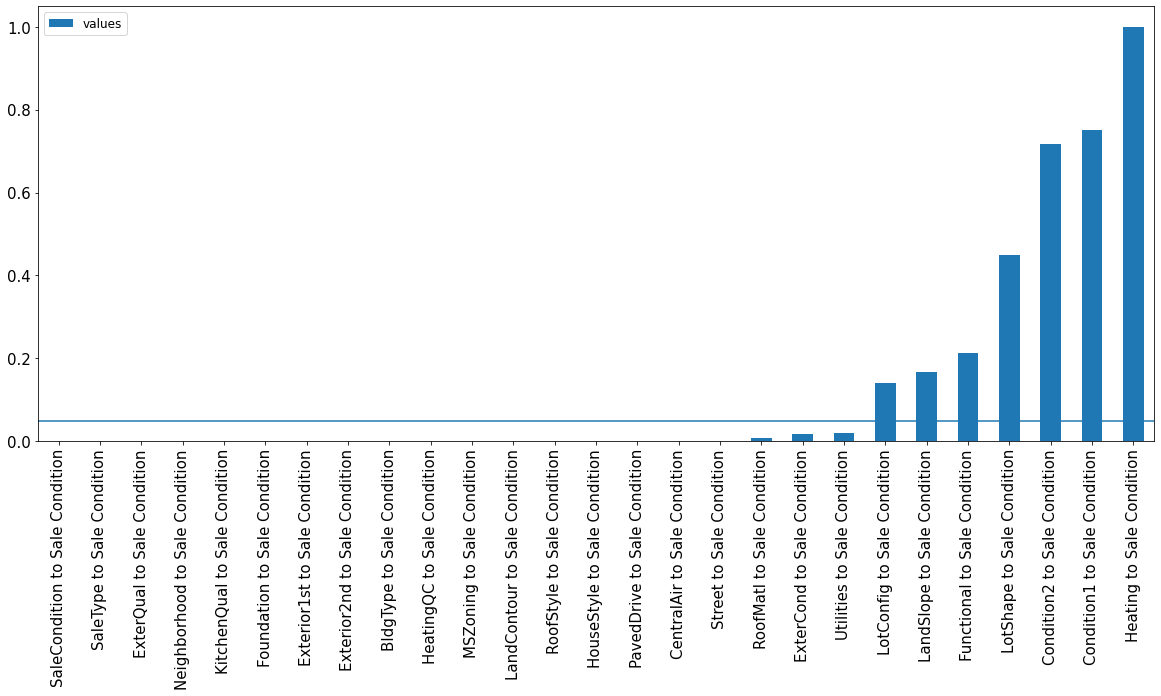

In [176]:
pval_df = pd.DataFrame.from_dict(pvalues, orient = 'index').rename(columns={0:'values'})
pval_df.sort_values(by='values').plot(kind='bar')
plt.axhline(0.05)
#plt.xticks(rotation= 45)

<font color = 'orange'>

# <font color='orange'>STOP HERE

## Predict house prices 

### Correlation and Simple Linear Regression 



In [58]:
#find the highest correlated value
plt.figure(figsize=(4, 14))
highest_corr = df_train.corr()['SalePrice'].sort_values(ascending = False)[:10]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
Name: SalePrice, dtype: float64

<Figure size 288x1008 with 0 Axes>

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

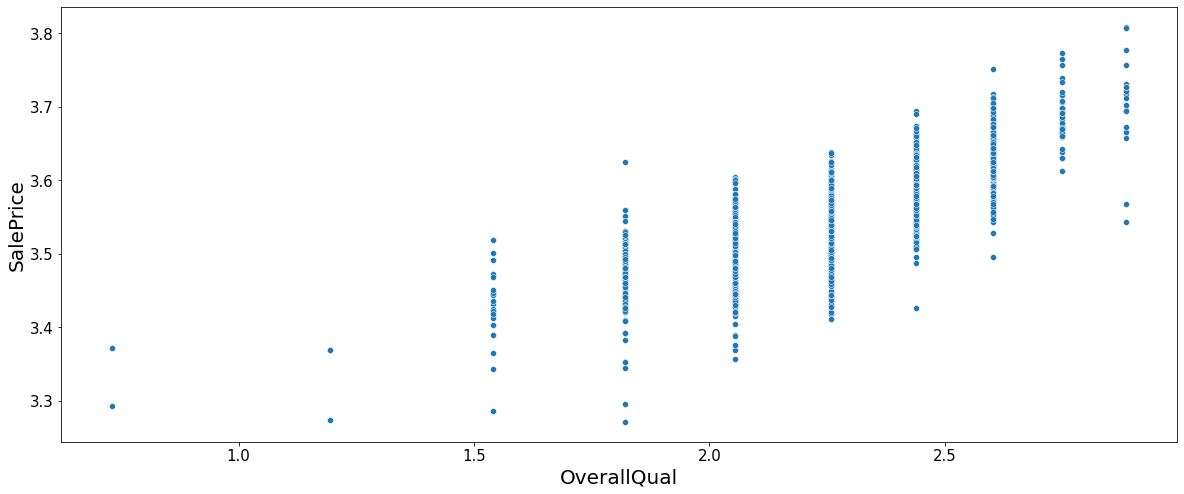

In [59]:
sns.scatterplot(x= 'OverallQual', y = 'SalePrice', data=df_train)

<AxesSubplot:xlabel='Total_Square_Feet', ylabel='SalePrice'>

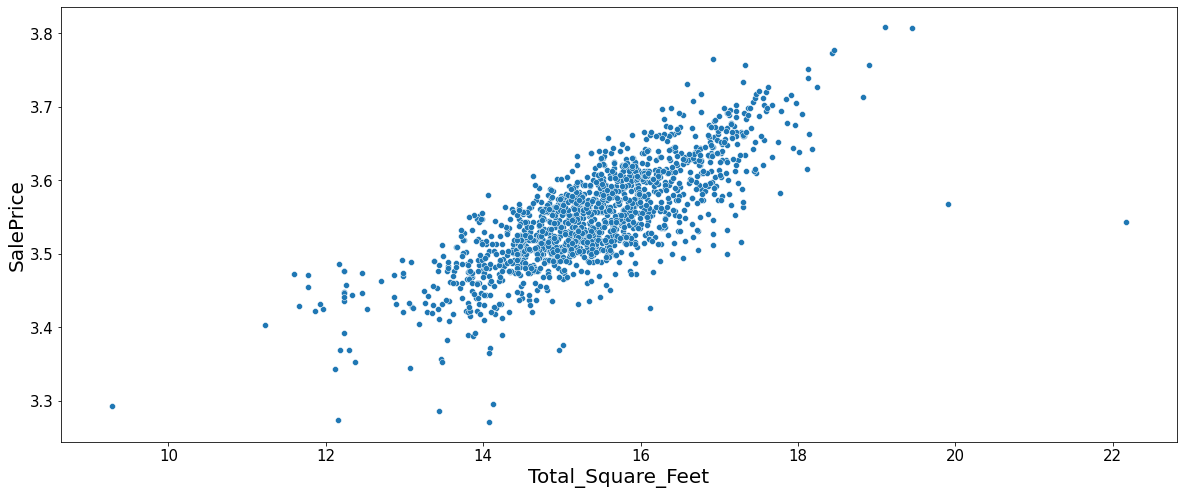

In [60]:
sns.scatterplot(x= 'Total_Square_Feet', y = 'SalePrice', data=df_train)

In [61]:
# target variable is SalePrice
y = df_train['SalePrice']

#target value is...
X = df_train['Total_Square_Feet']

In [62]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.018e+05
Date:                Wed, 29 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:55:55   Log-Likelihood:                          182.48
No. Observations:                1460   AIC:                                     -363.0
Df Residuals:                    1459   BIC:                                     -357.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [63]:
#note the error [2] above, add a constant
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2213.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          1.24e-294
Time:                        16:55:56   Log-Likelihood:                 2492.4
No. Observations:                1460   AIC:                            -4981.
Df Residuals:                    1458   BIC:                            -4970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8215      0.01

In [64]:
highest_corr.index

Index(['SalePrice', 'OverallQual', 'Total_Square_Feet', 'GrLivArea',
       'Total_Bath', 'GarageCars', '1stFlrSF', 'SqFtPerRoom', 'YearBuilt',
       'FullBath'],
      dtype='object')

In [65]:
#model results and r_squared
for i in highest_corr.index:
    X = df_train[i]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
#    print(model.summary())
    print(f"{i}:, {model.rsquared_adj}")

SalePrice:, 1.0
OverallQual:, 0.6495370919102863
Total_Square_Feet:, 0.6025446764108009
GrLivArea:, 0.5310564456244624
Total_Bath:, 0.45610798607560976
GarageCars:, 0.4228267859539039
1stFlrSF:, 0.37094315794802724
SqFtPerRoom:, 0.3448088734107362
YearBuilt:, 0.3420540422176246
FullBath:, 0.340037199285981


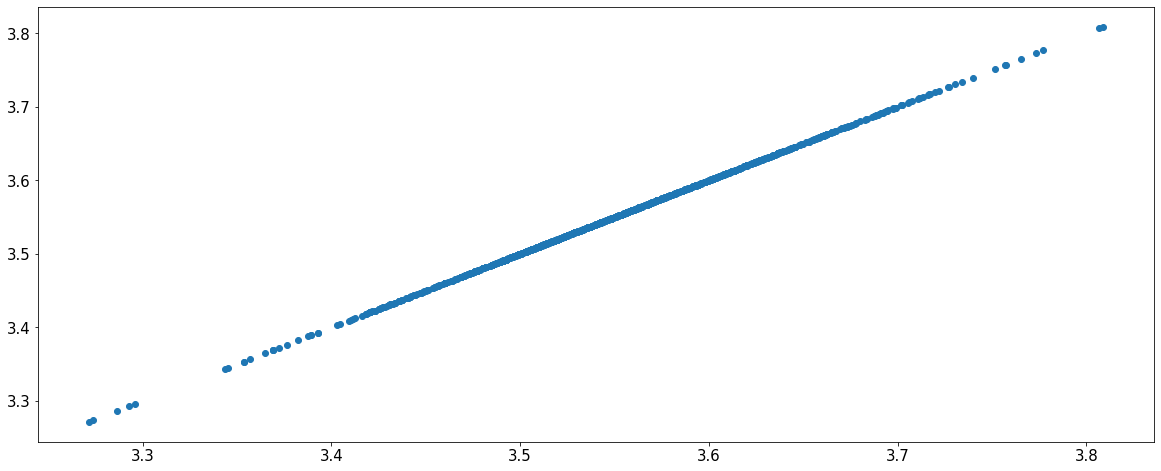

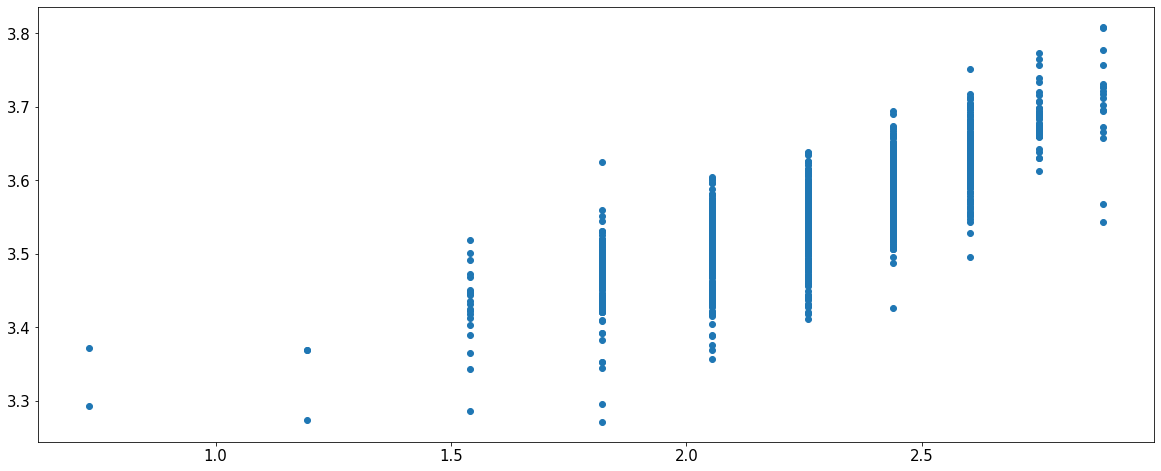

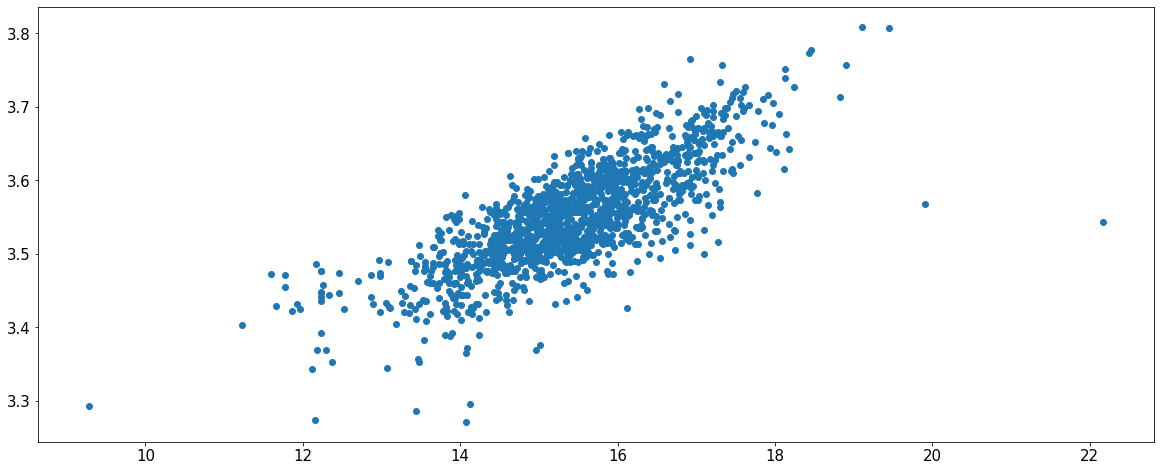

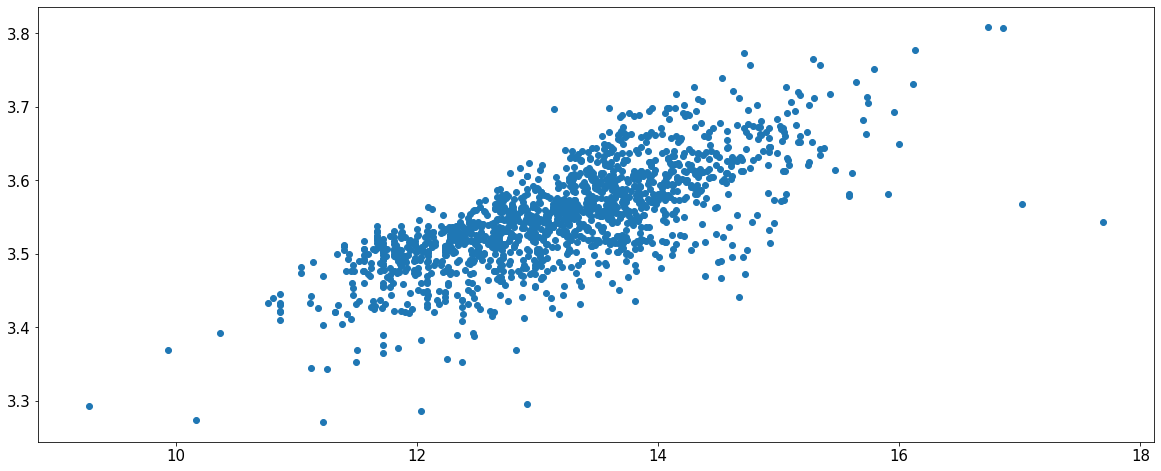

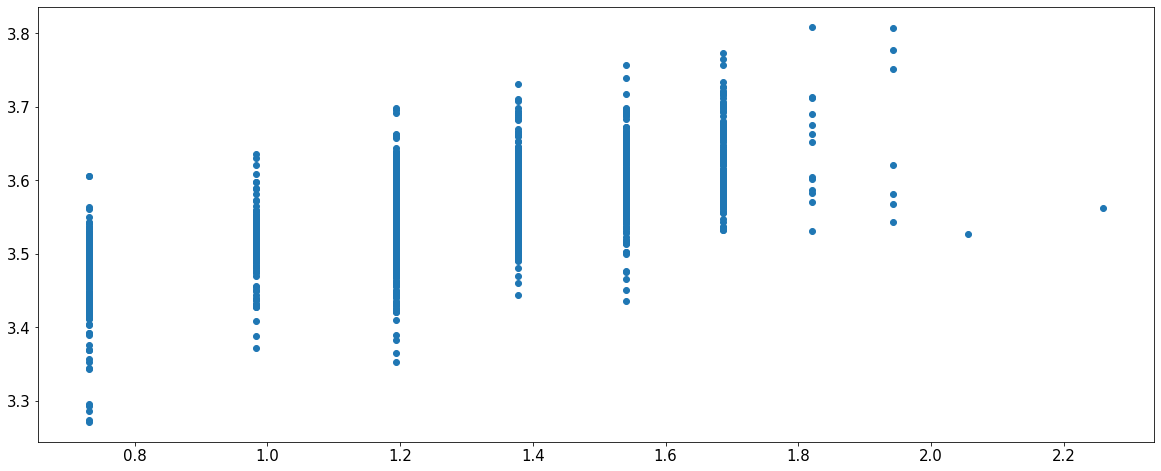

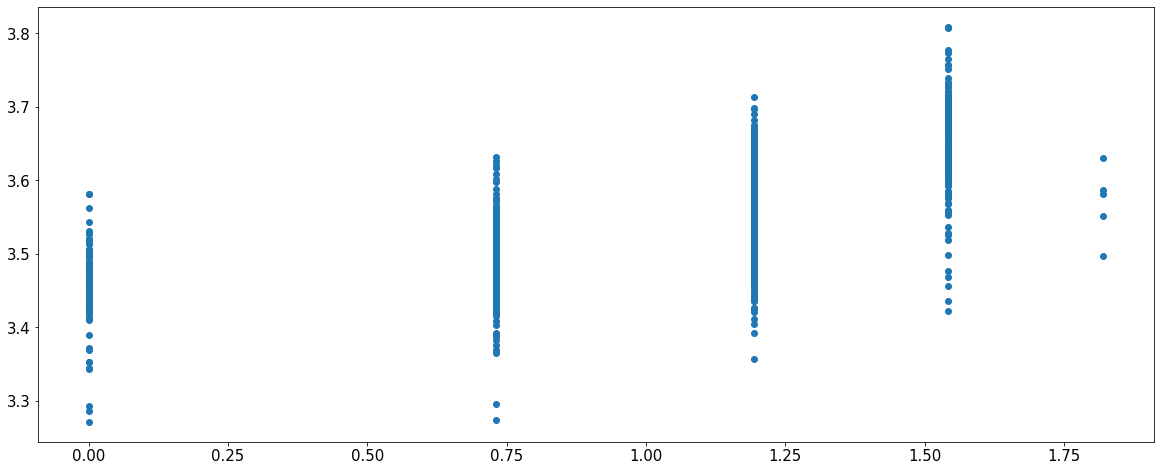

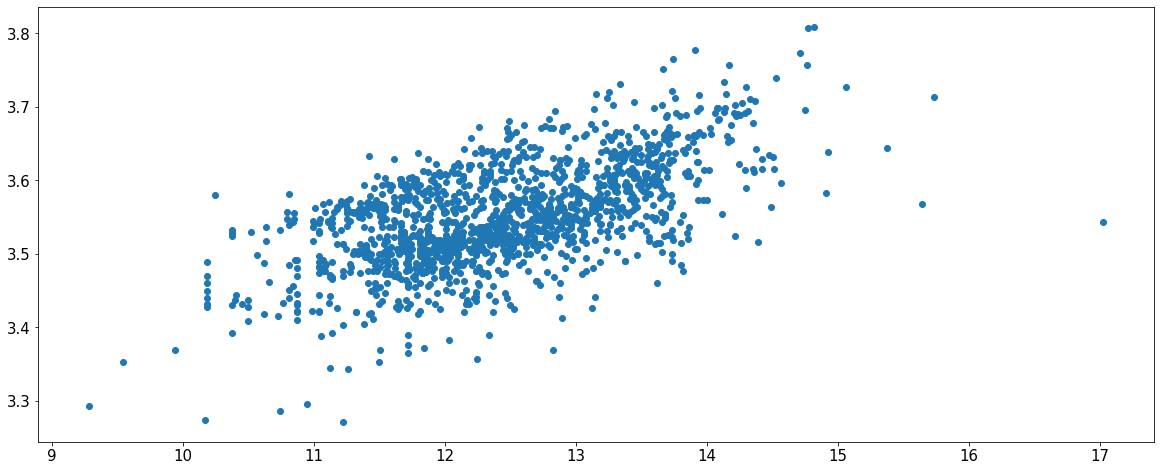

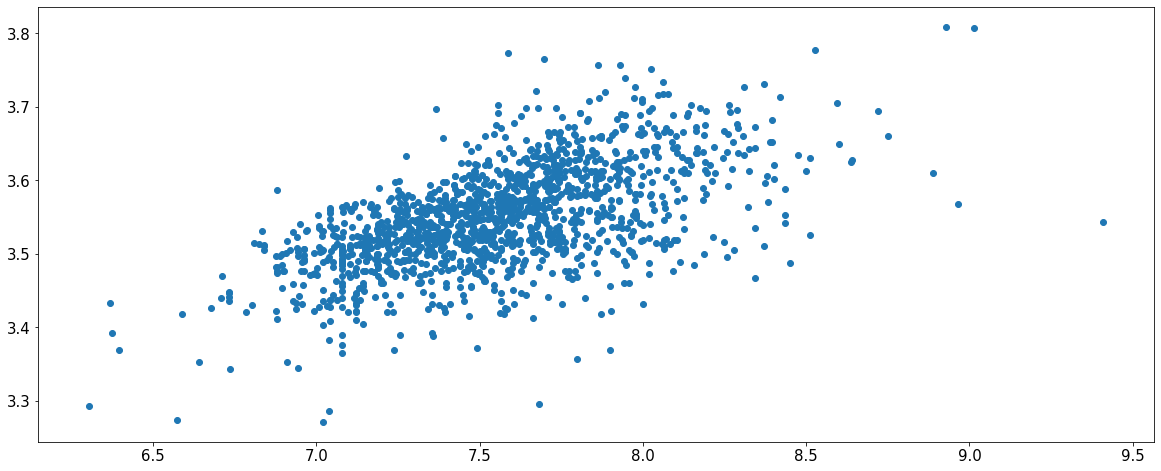

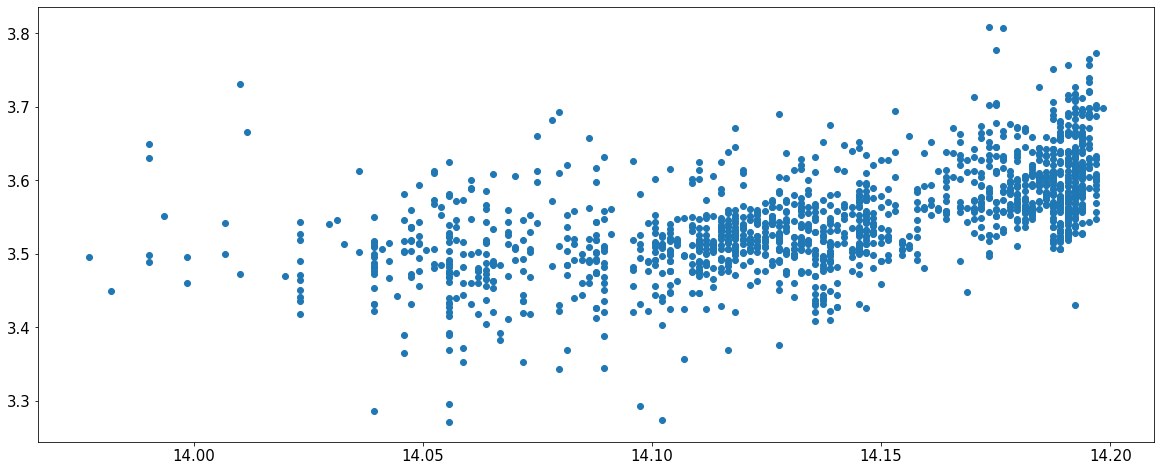

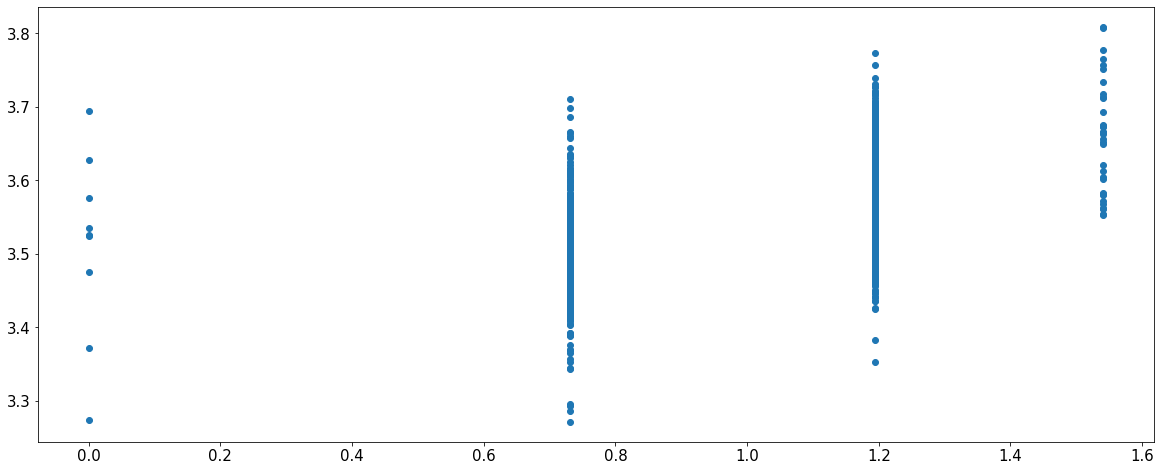

In [66]:
for i in highest_corr.index:
    plt.scatter(df_train[i], df_train['SalePrice'])
    plt.show()

In [67]:
#find the highest correlated value without accounting for abs 
plt.figure(figsize=(4, 14))
highest_corr = df_train.corr()['SalePrice'].sort_values(ascending = False)[:20]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
YearRemodAdd         0.566010
TotRmsAbvGrd         0.539781
Foundation_PConc     0.530551
GarageArea           0.510646
Fireplaces           0.506936
OpenPorchSF          0.454515
TotalBsmtSF          0.452692
MasVnrArea           0.422809
GarageType_Attchd    0.416985
LotArea              0.398697
Name: SalePrice, dtype: float64

<Figure size 288x1008 with 0 Axes>

In [68]:
#find the highest correlated value while accounting for abs 
plt.figure(figsize=(4, 14))
highest_corr = np.abs(df_train.corr()['SalePrice']).sort_values(ascending = False)[:20]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
BsmtQual             0.577796
YearRemodAdd         0.566010
ExterQual            0.540375
TotRmsAbvGrd         0.539781
Foundation_PConc     0.530551
GarageArea           0.510646
Fireplaces           0.506936
KitchenQual          0.506426
OpenPorchSF          0.454515
TotalBsmtSF          0.452692
Name: SalePrice, dtype: float64

<Figure size 288x1008 with 0 Axes>

### Multiple Linear Regression using Statsmodels

In [69]:
X = df_train[highest_corr.index.drop('SalePrice')]
y = df_train['SalePrice']

In [70]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     470.3
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:55:57   Log-Likelihood:                 3260.0
No. Observations:                1460   AIC:                            -6480.
Df Residuals:                    1440   BIC:                            -6374.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5047      0.48

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
X.values

array([[ 1.        ,  2.44026838, 15.77993717, ...,  1.19431764,
         5.7146689 , 11.69262259],
       [ 1.        ,  2.25967379, 16.0097674 , ...,  1.54096276,
         0.        , 12.79227623],
       [ 1.        ,  2.44026838, 15.69677179, ...,  1.19431764,
         5.05337105, 11.89203906],
       ...,
       [ 1.        ,  2.44026838, 16.25917956, ...,  1.19431764,
         5.68450666, 12.52811325],
       [ 1.        ,  2.05564154, 15.74065165, ...,  1.19431764,
         0.        , 12.33807443],
       [ 1.        ,  2.05564154, 16.13405277, ...,  1.54096276,
         5.91494002, 12.77838192]])

In [73]:
high_vif = pd.DataFrame()
high_vif['col_name'] = X.columns
high_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
high_vif

,col_name,vif
0,const,509225.427052
1,OverallQual,3.029153
2,Total_Square_Feet,10.987548
3,GrLivArea,61.276635
4,Total_Bath,4.441959
5,GarageCars,6.829657
6,1stFlrSF,3.181932
7,SqFtPerRoom,20.477786
8,YearBuilt,3.124999
9,FullBath,3.424388


In [74]:
low_col = high_vif[high_vif['vif'] < 5]
low_col_variables = list(low_col['col_name'][1:].values)
low_col_variables

['Total_Bath',
 '1stFlrSF',
 'YearBuilt',
 'FullBath',
 'BsmtQual',
 'YearRemodAdd',
 'ExterQual',
 'Foundation_PConc',
 'Fireplaces',
 'KitchenQual',
 'OpenPorchSF',
 'TotalBsmtSF']

In [75]:
X = df_train[low_col_variables]
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     401.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:                 2888.5
No. Observations:                1460   AIC:                            -5751.
Df Residuals:                    1447   BIC:                            -5682.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.6784      0.568  

In [76]:
XT = df_train[low_col_variables]
high_vif = pd.DataFrame()
high_vif['col_name'] = XT.columns
high_vif['vif'] = [variance_inflation_factor(XT.values, i) for i in range(len(XT.columns))]
high_vif



,col_name,vif
0,Total_Bath,41.196775
1,1stFlrSF,298.809098
2,YearBuilt,158040.666661
3,FullBath,34.427258
4,BsmtQual,16.136442
5,YearRemodAdd,156902.381090
6,ExterQual,39.631639
7,Foundation_PConc,3.332530
8,Fireplaces,2.577423
9,KitchenQual,20.669761


In [77]:
X = df_train[low_col_variables].drop(columns= ['YearBuilt', 'YearRemodAdd'])
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     438.9
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:                 2835.6
No. Observations:                1460   AIC:                            -5649.
Df Residuals:                    1449   BIC:                            -5591.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.2287      0.017  